# **Milestone 1 and Milestone 2**

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

#### See Presentation Slide attached for Problem Definition, Objectives, Key Questions, and Problem Formulation

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [2]:
hm=pd.read_excel("hmeq.xlsx")

In [3]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [4]:
data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [5]:
data.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519

### **Understand the shape of the dataset**

In [6]:
data.shape

(5960, 13)

**Insights**

- The data set has 5960 rows and 13 columns

### **Check the data types of the columns**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights**
- BAD has no missing values and is shown to be data type integer. 1 = Client defaulted on loan, 0 = loan repaid. Although the data is numeric (integer) it is a categorical variable. BAD is also our target variable.
- LOAN is also an integer data type. It has no decimal values
- MORTDUE, VALUE, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, and DEBTINC are all float64 data types. So they are numeric in nature and all contain decimals.
- Although DELINQ and DEROG are numerical variables, it is between a very small bound (0-9) so we can convert it or think of it as a categorical variable
- REASON and JOB are object data type/or strings. They contain words and letters. They are categorical data.

### **Check for missing values**

In [8]:
# Analyse missing values - Hint: use isnull() function
data.count()

BAD        5960
LOAN       5960
MORTDUE    5442
VALUE      5848
REASON     5708
JOB        5681
YOJ        5445
DEROG      5252
DELINQ     5380
CLAGE      5652
NINQ       5450
CLNO       5738
DEBTINC    4693
dtype: int64

**Insights**

- BAD, LOAN are the only two columns or variables that have no missing values
- DEBTINC has the most missing values (5960-4693=1267)


In [9]:
pd.options.display.max_rows = 50

In [10]:
data_missing=data.isnull()
data_missing

BAD   LOAN  MORTDUE  VALUE  REASON    JOB    YOJ  DEROG  DELINQ  \
0     False  False    False  False   False  False  False  False   False   
1     False  False    False  False   False  False  False  False   False   
2     False  False    False  False   False  False  False  False   False   
3     False  False     True   True    True   True   True   True    True   
4     False  False    False  False   False  False  False  False   False   
...     ...    ...      ...    ...     ...    ...    ...    ...     ...   
5955  False  False    False  False   False  False  False  False   False   
5956  False  False    False  False   False  False  False  False   False   
5957  False  False    False  False   False  False  False  False   False   
5958  False  False    False  False   False  False  False  False   False   
5959  False  False    False  False   False  False  False  False   False   

      CLAGE   NINQ   CLNO  DEBTINC  
0     False  False  False     True  
1     False  False  False     True  
2     False  False  False     True  
3      True   True   True     True  
4     False  False  False     True  
...     ...    ...    ...      ...  
5955  False  False  False    False  
5956  False  False  False    False  
5957  False  False  False    False  
5958  False  False  False    False  
5959  False  False  False    False  

[5960 rows x 13 columns]

**Insights**
- above chart uses boolean to identify null values. True = missing values, False= not missing 

In [11]:
# Check the percentage of missing values in the each column.
data_missing.sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [12]:
data_missing.sum()/data.shape[0]*100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

**Insights**
- as mentioned before DEBTINC has the most missing values, ~21%. DEBTINC is all your monthly debt payments divided by your gross monthly income. This could be becuase many people did not report their monthly income.
- After DEROG has the missing values, ~12% respectively. 
- BAD an LOAN have no missing values
- VALUE only has ~2% missing values
- In general our data set has a lot of missing values

### **Think about it:**
- We found the total number of missing values and the percentage of missing values, which is better to consider?

Opinion: It totally depends on the goal of the data anlysis. Looking at percentage of missing values has always been my go-to as if a variable has more than 50% missing values, I tend to drop that variable

- What can be the limit for % missing values in a column in order to avoid it and what are the challenges associated with filling them and avoiding them? 

Opinion: Any variable that has more than 50% missing values will provide insufficient value to our analysis. You can always fill the missing values with the mean or median of the variable but once again will lead to an inaccurate model.

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [13]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [14]:
cols

['REASON', 'JOB', 'BAD']

In [15]:
# Changing the data type of object type column to category. hint use astype() function


for i in cols:
    data['REASON'] = data['REASON'].astype('category')
    data['JOB'] = data['JOB'].astype('category')
    data['BAD'] = data['BAD'].astype('category')

In [16]:
# Checking the info again and the datatype of different variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


**Insights**

- BAD has no missing values and is shown to be data type cateogry now. 1 = Client defaulted on loan, 0 = loan repaid. Although the data is numeric (integer) it is a categorical variable. BAD is also our target variable.
- LOAN is also an integer data type. It has no decimal values
- MORTDUE, VALUE, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, and DEBTINC are all float64 data types. So they are numeric in nature and all contain decimals.
- Although DELINQ and DEROG are numerical variables, it is between a very small bound (0-9) so we can convert it or think of it as a categorical variable
- REASON and JOB are object data type categorical now. They contain words and letters. 

### **Analyze Summary Statistics of the dataset**

In [17]:
# Analyze the summary statistics for numerical variables

num_cols = data.select_dtypes('number').columns

data[num_cols].describe().T

count           mean           std          min           25%  \
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149

**Insights**

**LOAN**
- Loan has no misisng values
- average loan amount is ~18,608 units of currency
- std is pretty high so this shows the LOAN data has a lot of variance
- min is 1100 while max is 89,900
- over 75% of the data is is below 23,300. This means there is many outliers

**MORTDUE**
- has 518 missing values
- average amount due on existing mortgage is ~73,761
- although std is lower than then mean it is pretty high. So data is not clustered around mean and is very disperse
- min is 2063 while max is 399,550. Seems like some mortgages are almost close to the amortization period while others are far away.
- over 75% data is under 91,488. Once again many outliers

**VALUE**
- has 112 missing values
- average value of property is ~101,776
- looking at value it looks like this is a state where house values are very low (Oklahoma, Ohio, etc)
- could also mean the houses are smaller
- std is smaller than mean so there isnt too much variance or spread, data is close to mean
- there are outliers tho, as the min is 8,000 and the max is 855,909

**YOJ**
- has 515 missing values
- average years at present job is ~9. 
- the average shows that most people who apply for a loan are at a steady point in their career, they are well settled in there job.
- std is ~7.6, lower than the mean, so there isnt do much variance. Data is clustered close to the mean it appears
- min is 0. So there are some people who are new to their current job
- max is 41!

**DEROG**
- has 708 missing values
- average number of major deragatory reports is less than one. Mean is ~0.25. Which makes sense because the bank would give a loan to a client if they have negative credit report. Although restrictions apply as usual.
- std is more than the mean, so data is more disperse/spread out
- min is obviously 0
- max is 10
- 75% of data is 0. there are outliers.

**DELINQ**
- 580 missing values
- average of ~0.5 deliquencies. Once again less than 1 which is good, so most people dont make late minimum payments.
- std is high, so data is more disperse and has variance
- min is obviously 0 
- max is 15, this client has a lot of missed minimum payments
- 75% of the data is 0. There are outliers tho. 25% of data is more than 0.

**CLAGE**
- 308 missing values
- average age of the oldest credit line in months is ~180. So about 15 years. Looks like people dont close their credit line once its been paid off or they take their time to pay off the credit line
- std is low so data is clustered around the mean
- min is 0. max is ~1168

**NINQ**
- 510 missing values
- average number of recent credit inquiries is ~1.19. Credit inquiries can be made for several things such as getting phone plan, applying for a credit card, etc. The more credit inquiries made in a short period of time does affect your credit score and can affect chances of getting a credit line or loan.
- std is high, so data has a lot of variance
- min is 0. Max is 17
- 75% of data is less than 2

**CLNO**
- 222 missing values
- average number of exisitng credit lines is ~21. This a shockingly high average. 21 credit lines is a lot and means the person has a lot of debt.
- std is low so data is clustered around the mean
- min is 0. Max is 71!

**DEBTINC**
- 1267 missing values. Many people probably didn't report their income
- average debt-income ratio is ~34
-  Lenders prefer to see a debt-to-income ratio smaller than 36%, with no more than 28% of that debt going towards servicing your mortgage.
- std is quite low, so data doesn't have too much variance
- min is about 0.53, while max is about 203



In [18]:
# Check summary for categorical data 

cat_cols= data.select_dtypes('category').columns

data[cat_cols].describe().T

count unique      top  freq
BAD     5960      2        0  4771
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

**Insights**
- BAD has no missing values and has two unique values. Either  1 = Client defaulted on loan, or 0 = loan repaid. 0 or loan repaid is the most frequent unique value. So out of 5960 people, 4771 repaid their loan.
- REASON has 252 missing values. It has 2 unique values, either HomeImp or DebtCon. DebtCon is most frequent unique value from the two.  DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts.
- JOB has 279 missing values. Has 6 unique values: Manager, ProfEx, Self-Employed, Other, Office, Sales. Most common unique value is "other" at a frequency of 2388. Which makes sense because people didn't have too many options of occupations to choose from.


**Let's look at the unique values in all the categorical variables**

In [19]:
# Checking the count of unique values in each categorical column 


cols_cat= data.select_dtypes(['category'])

for i in cols_cat:
    print(data[i].value_counts(normalize=True)*100)  #normalize = true, give thes percentage of each column
    print('*'*50)

0    80.050336
1    19.949664
Name: BAD, dtype: float64
**************************************************
DebtCon    68.815697
HomeImp    31.184303
Name: REASON, dtype: float64
**************************************************
Other      42.034853
ProfExe    22.460834
Office     16.687203
Mgr        13.501144
Self        3.397289
Sales       1.918676
Name: JOB, dtype: float64
**************************************************


**Insights**
-  for BAD 80% of the values are 0 (load repaid) and about 20% of the values are 1 (client defaulted).
- for REASON (reason of loan) about 69% of the values are DebtCon (debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) and about 31% are for HomeImp (home improvement)
- for JOB (type of jobs client held when applying for loan) 42% chose other, about 22% chose ProfExe, about 17% chose Office, about 14% chose Mgr, about 3% chose self-employed, and about 2% chose Sales. 

### **Think about it**
- The results above gave the absolute count of unique values in each categorical column. Are absolute values a good measure? 
- If not, what else can be used? Try implementing that. 

Opinion: you can also measure central tendency using Mean,Median, and Mode

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [20]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN
**Note** The interquartile range is the middle 50% of a data set.

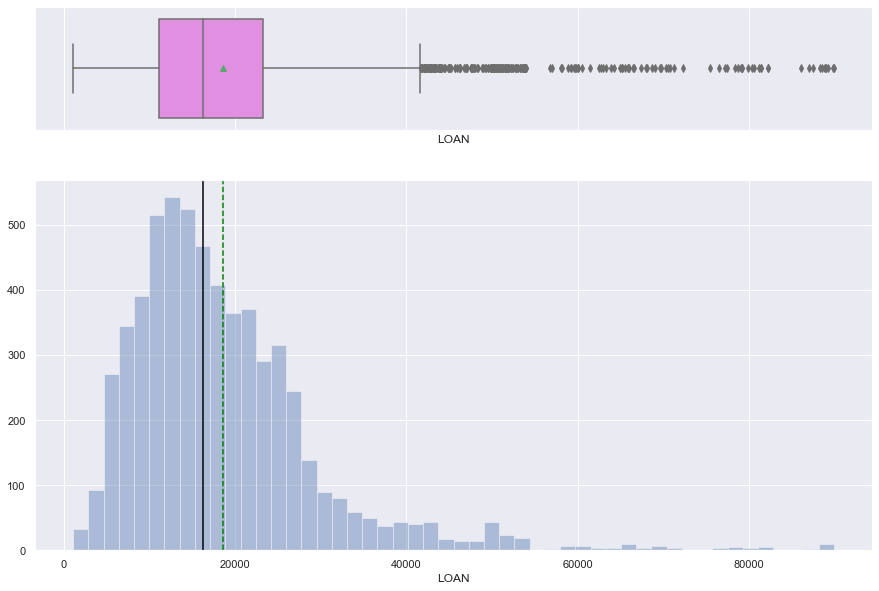

In [21]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

**Insights**
- mean is greater than the median so LOAN distribution is positively skewed.
- there are many extreme outliers to right of distribution. Max outlier is almost 900,000
- majority of the LOAN amount is below is ~25,000. Lower and upper whisker ranges between 1100- ~42,000
- the distribution is at its highest point around LOAN amount 10,00 --about 550 people
- IQR is 23300-11100=12200


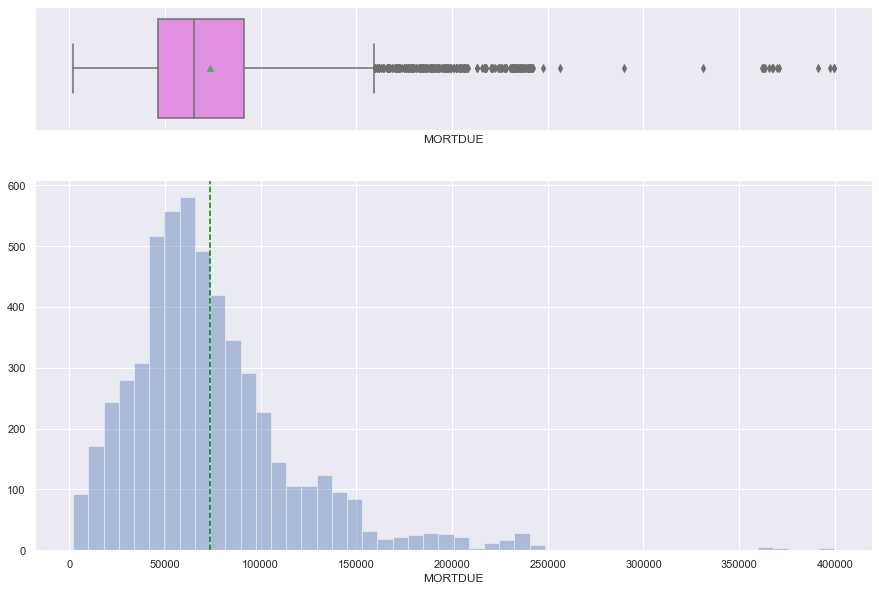

In [22]:
histogram_boxplot(data['MORTDUE'])

**Insights**
- mean is greater than the median so MORTDUE distribution is positively skewed
- many extreme outliers to right of distribution. Max outlier is almost at 400,000
- majority of the MORTDUE is under the amount of ~150,000. Lower and upper whisker ranges from ~3000- ~170,000
- distribution is at its highest point around ~60,000 with a count of almost 600
- IQR=91488-46276=45212


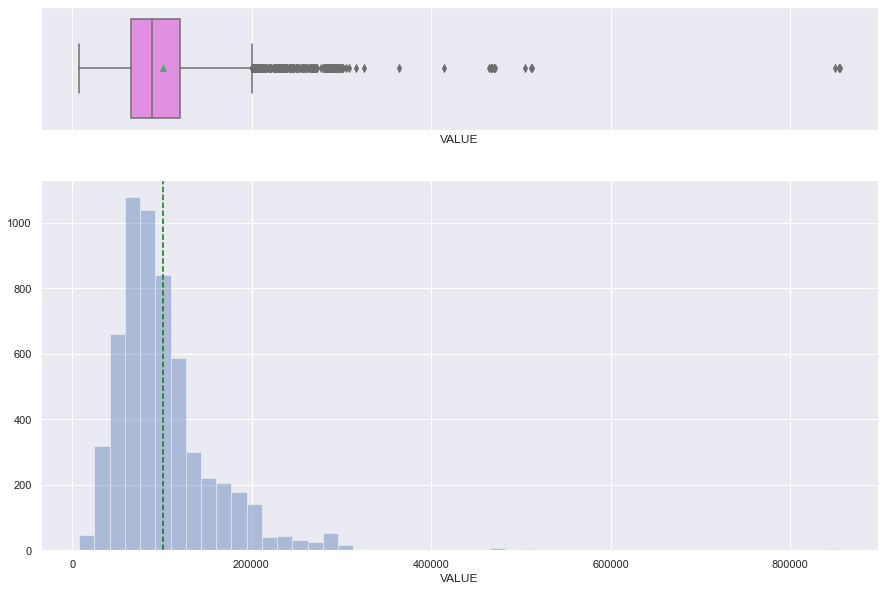

In [23]:
histogram_boxplot(data['VALUE'])

**Insights**
- mean is greater than median so VALUE distribution is positively skewed
- there are many extreme outliers to right of distribution. Max outlier is almost at ~860,000
- majority of the VALUE is under the amount of 180,000. Lower whisker starts at about 10,000 and upper whisker ends at 200,000
- distribution is highest point at VALUE of about 100,000 with a count of ~1100 people
- IQR= 119824.25-66075.5=53748.5


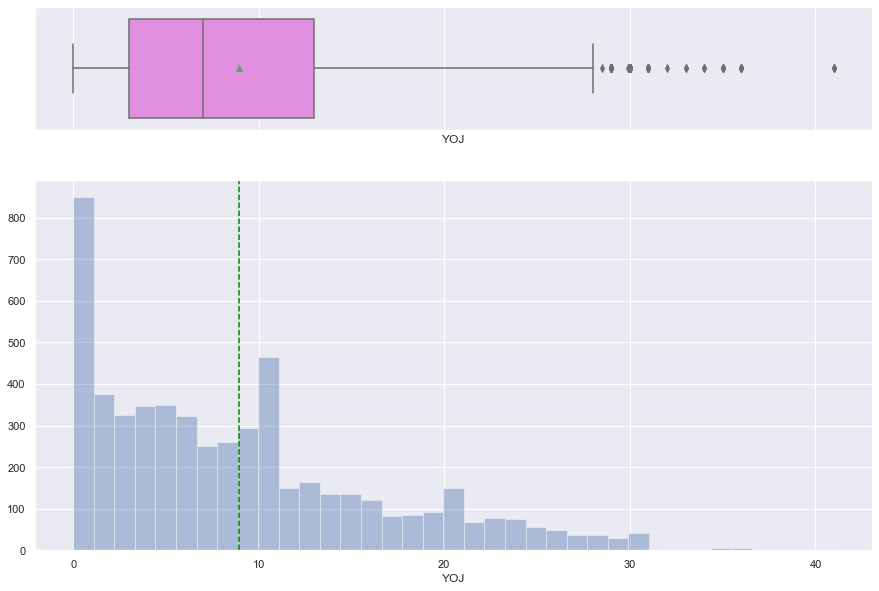

In [24]:
histogram_boxplot(data['YOJ'])

**Insights**
- mean is greater than the median, distribution is highly right or positively skewed
- there are some extreme outliers to right of distribution. Max outlier is about 41 YOJ
- majority count of data is under 10 years at present job. Lower whisker starts at 0 and upper whisker ends at ~27.
- distribution is at its highest point at 0 YOJ with a count of about 850 people
- IQR= 13-3= 10

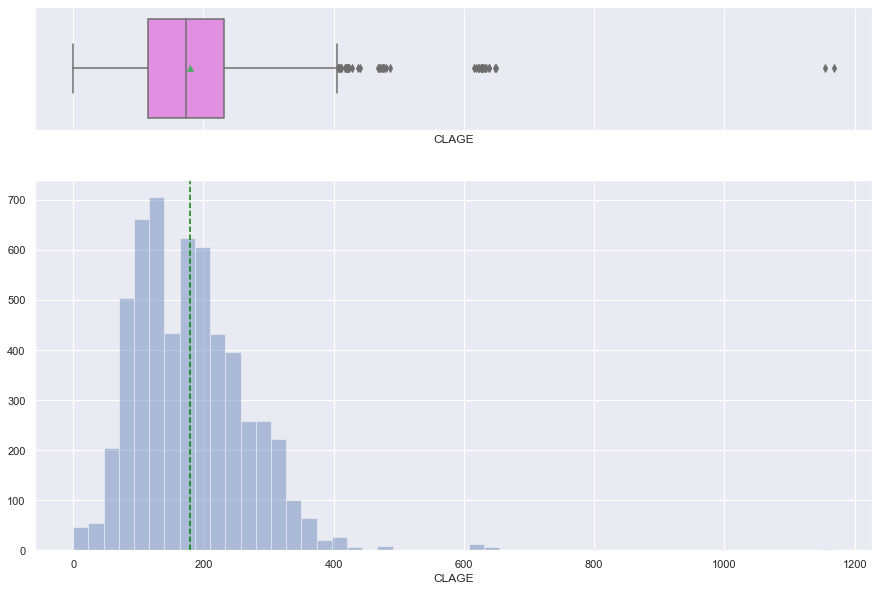

In [25]:
histogram_boxplot(data['CLAGE'])

**Insights**
- distribution is close to being symmetric but not quite, mean is still greater than median. Very slightly positive skewed
- there are extreme outliers to right of distribution. Max outliers is ~1170
- majority count of data is under 300 months. Lower whisker starts at 0, upper whisker ends at ~400.
- distribution is at its highest point at about 100 months with a count of ~710
- IQR=231.56-115.12=116.44 REMINDER IQR is middle 50% of the data

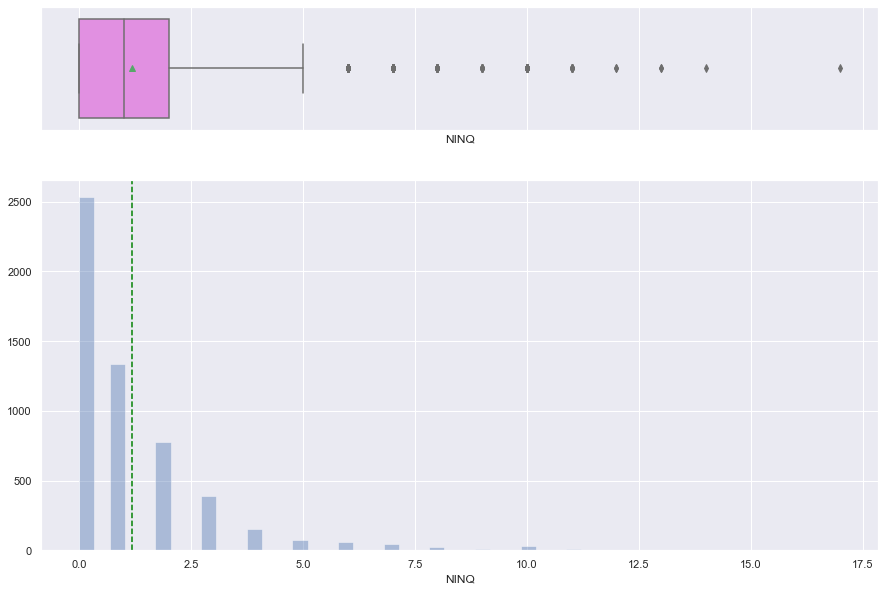

In [26]:
histogram_boxplot(data['NINQ'])

**Insights**
- distribution is highly right or positive skewed
- there some extreme outliers to the right of the distribution. Max outlier is ~17.
- 0 NINQ holds the highest count at a little above 2500. Lower whisker-Upper Whisker range is from 0-5
- IQR= 2-0= 2

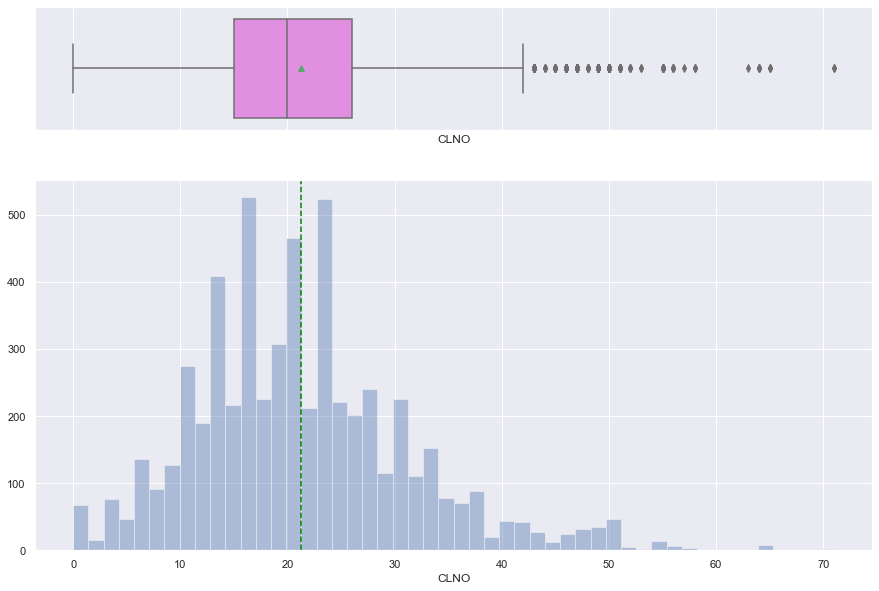

In [27]:
histogram_boxplot(data['CLNO'])

**Insights**
- closer to a symmetric distribution but still right skewed a bit
- there are extreme outliers to the right of the distribution. Max outlier is 71.
- distribution is at its highest point at about 16 credit lines with a count of ~550. 
- Whiskers range from 0 to about 42 credit lines
- IQR= 26-15=11

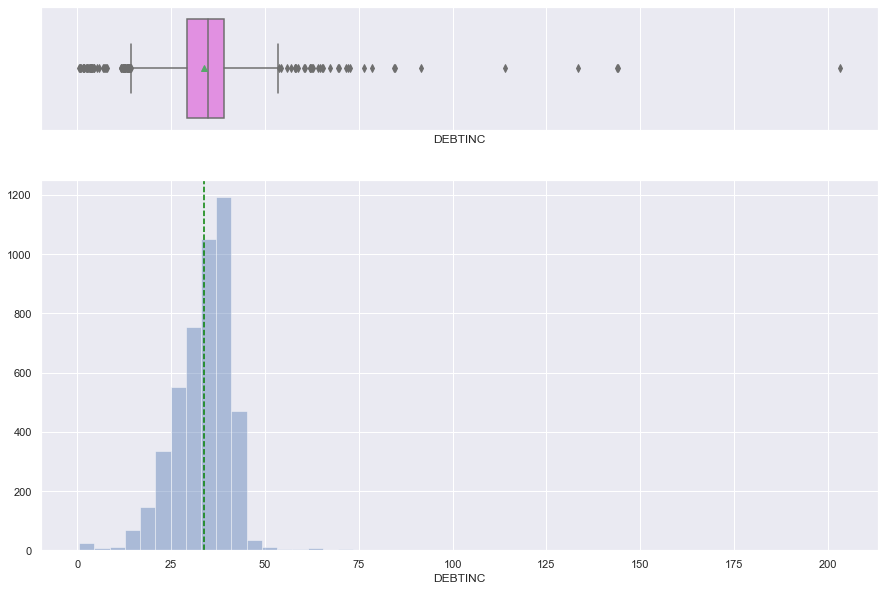

In [28]:
histogram_boxplot(data['DEBTINC'])

**Insights**
- mean is less than the median. Distribution is negative or left skewed.
- there are extreme outliers to both the left and right of distribution. Min outlier is about 0.5 max is about 203
- distribution is at its highest point at ~40 with a count of ~1200 people.
-  Lenders prefer to see a debt-to-income ratio smaller than 36%, with no more than 28% of that debt going towards servicing your mortgage.
- whiskers range from ~15 to about ~55.
- IQR= 39-29=10

### **2. Univariate Analysis - Categorical Data**

In [29]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

**Although DELINQ and DEROG are numerical variables, it is between a very small bound (0-9) so we can convert it or think of it as a categorical variable**

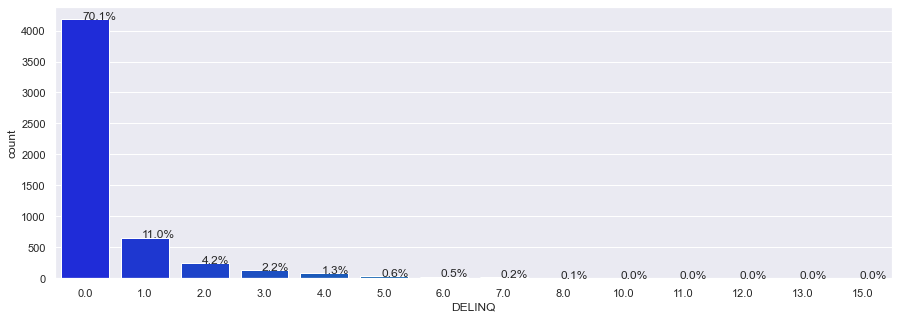

In [30]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Insights**
- 0 delinquencies has the highest count (70.1%) at about 4100. 
- followed by 1,2,3,4 respectively

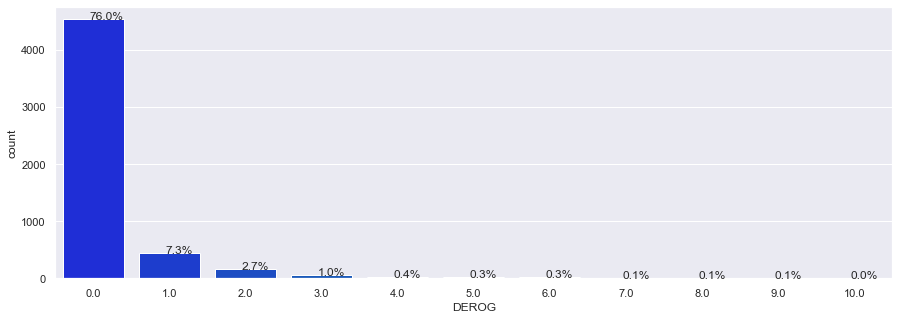

In [31]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["DEROG"],palette='winter')
perc_on_bar(ax,data["DEROG"])

**Insights **
- 0 derogatory reports has the highest count (76%) at about 4800 people.
- there is very small percentage of people with more than 3 derogatory reports

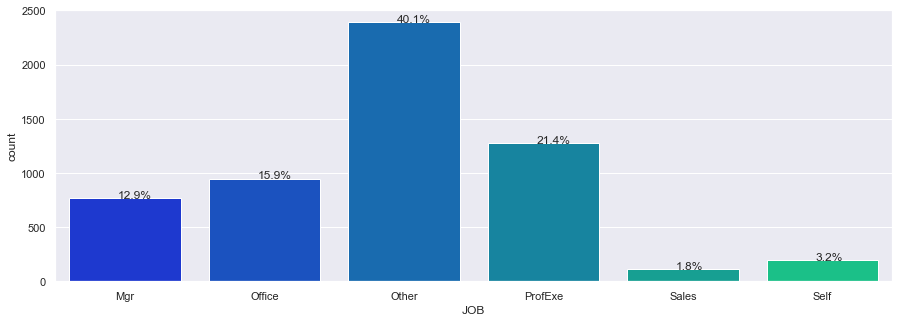

In [32]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["JOB"],palette='winter')
perc_on_bar(ax,data["JOB"])

**Insights**
- 40.1% of people (about ~2300 people) chose job category "Other"
- 21.4% of people (~1250 people) chose ProfExe
- 15.9 % of people (~900 people) chose Office
- 12.9% of people (~700 people) chose Manager
- 3.2% chose self employed
- 1.8% chose sales

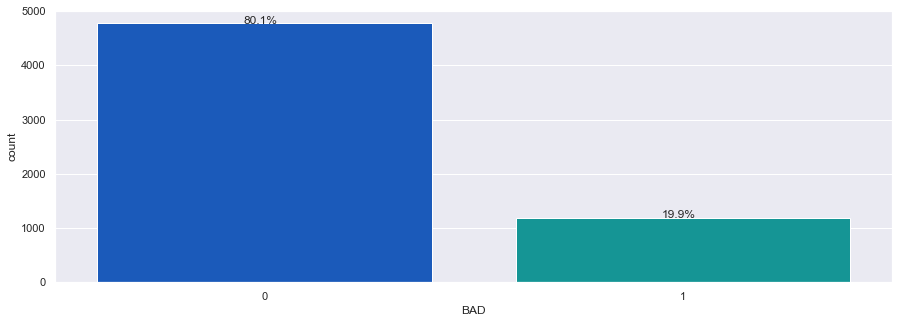

In [33]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["BAD"],palette='winter')
perc_on_bar(ax,data["BAD"])

**Insights **
- 80.1% of people (about 4774 people--->80.1% of 5960) fully paid their loan back
- 19.9% percent of people defaulted ( about 1186 people)

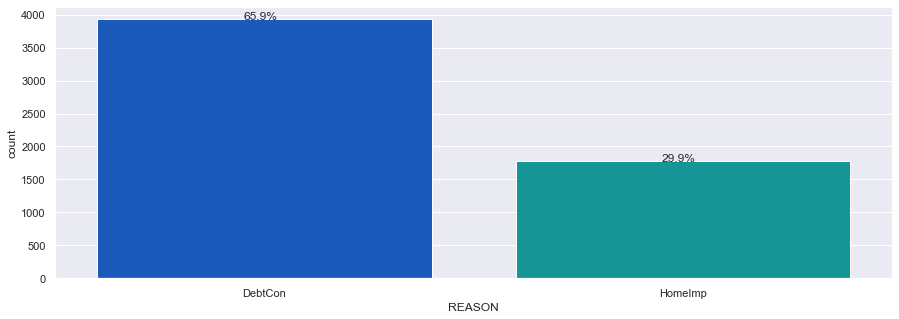

In [34]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["REASON"],palette='winter')
perc_on_bar(ax,data["REASON"])

**Insights**
- 65.9% of people (~4000 people) applied for a loan to consolidate previous debts (includes credit cards, home line of credit/mortgage, car loan, etc)
- 29.9% of people (~1750 people) applied for a loan for a Home Improvement

## **Bivariate Analysis**

**Bivariate Analysis: Continuous/Discrete numerical variables and Categorical Variables**
**LOAN, MORTDUE, and VALUE are the only continous variables**
**Although DELINQ and DEROG are numerical variables, it is between a very small bound (0-9) so we can convert it or think of it as a categorical variable**

In [35]:
from matplotlib import rcParams

#### Analyze BAD vs Loan

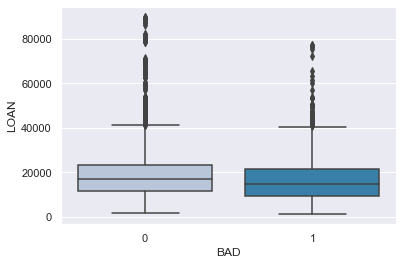

In [36]:
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")
rcParams['figure.figsize'] = 10,10


**Insights**
- for both people who defaulted on their loan or didnt default. the loan amount didnt seem to have an affect. The whisker length for both loan deafault and loan paid is the same
- the median loan amount for people who did pay back their loan amount is slightly above people who defaulted
- BAD(0) has more extreme outliers. ~80,000 is the max loan amount where a client defaulted
- BAD(1) clients have repaid loans at amounts upto ~100,000 at its max
- BAD(0) has the greatest range dispersion between min and max values

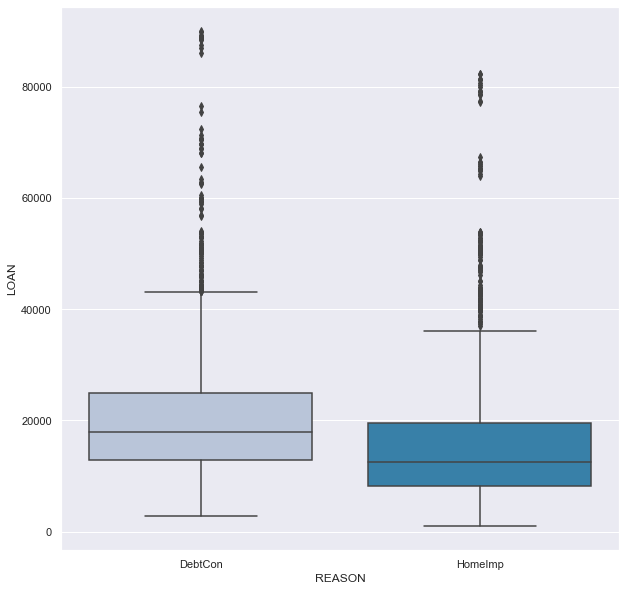

In [37]:
sns.boxplot(data["REASON"],data['LOAN'],palette="PuBu")
rcParams['figure.figsize'] = 10,10

**Insights**
- people took out a higher loan amount for reason DebtCon.
- median loan amount is smaller for REASON: Home Improvement
- median for DebtCon is about ~19,000 while for HomeImp its ~10,000
- IQR is also bigger for DebtCon.
- both have extreme outliers but DebtCon has higher Loan value amount for its extreme outliers
- DebtCon has the greatest range dispersion between min and max values

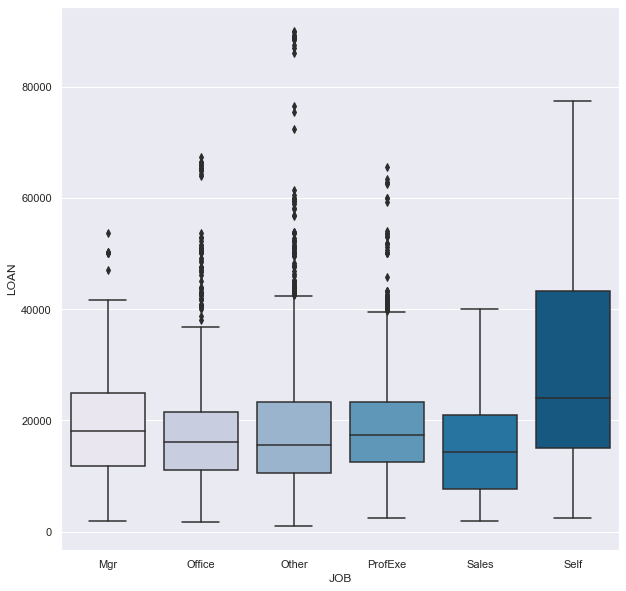

In [38]:
sns.boxplot(data["JOB"],data['LOAN'],palette="PuBu")
rcParams['figure.figsize'] = 10,10

**Insights**
- Self-employed as the highest whisker range and the greatest median for loan amount approved from the bank
- Sales professionals have the lowest median loan amount approved. Most likely because in average they make the lowest monthly income
- Sales professionals and self employed has no outliers
- Other has the most outliers and the highest outlier.AKA biggest range dispersion
- Mgr has the least outliers
- JOB type Office has smallest whisker length

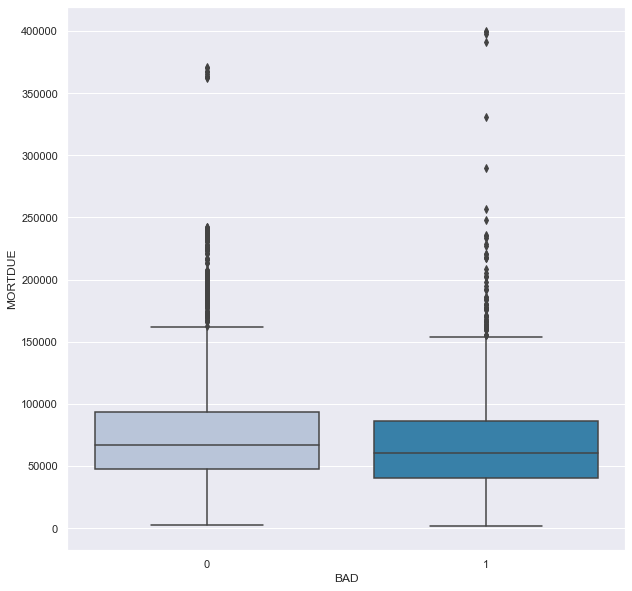

In [39]:
sns.boxplot(data["BAD"],data['MORTDUE'],palette="PuBu")
rcParams['figure.figsize'] = 10,10

**Insights**
- people who repaid their loan has a higher median amount due on existing mortgage vs a person who defaulted on their loan
- people who defaulted on their loan have more extreme outliers against MORTDUE
- BAD(0) has a bit bigger whsker range and IQR compared to BAD (1)
- Bad(1) has the greatest range dispersion between min and max values of MORTDUE

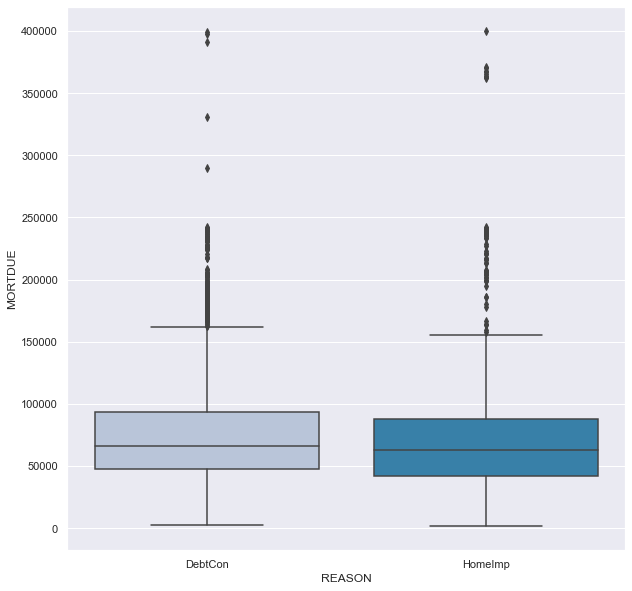

In [40]:
sns.boxplot(data["REASON"],data['MORTDUE'],palette="PuBu")
rcParams['figure.figsize'] = 10,10

**Insights**
- Debt Consolidation has a bit higher median vs Home Improvment against the amount due on their current mortgage
- both have extreme outliers.
- REASON doesnt have a great afffect on MORTDUE it appears
- both reasons have equal range dispersion between min and max values of MORTDUE

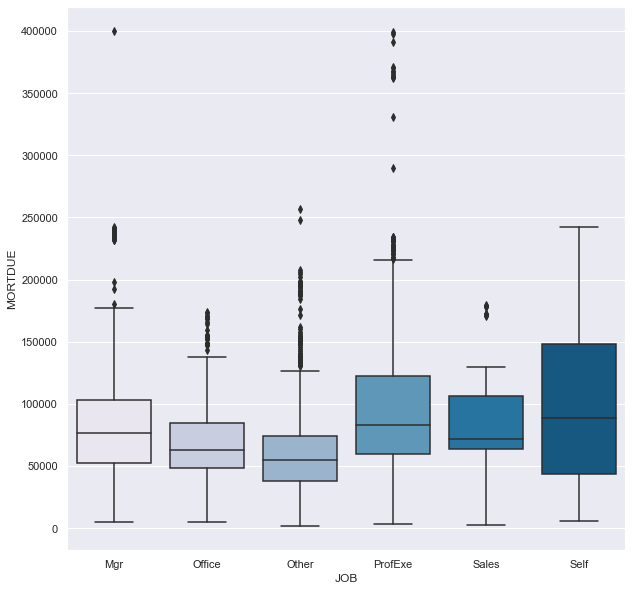

In [41]:
sns.boxplot(data["JOB"],data['MORTDUE'],palette="PuBu")
rcParams['figure.figsize'] = 10,10

**Insights**
- Job type Self-Employed has the greatest mediam for amount due on existing mortgage when compared to other job types.
- Self employed also seems to have greatest IQR and whisker length
- ProfEx has the max outlier against MORTDUE compared to other job titles
- OTHER has the lowest median for amount due on existing mortgage. As you can see OTHER has the lowest amount due on exisitng loans and also is approved for the greatest loan amount if you loook at the previous charts.
- Mgr and ProfEx have the greatest range dispersion between min and max values of MORTDUE


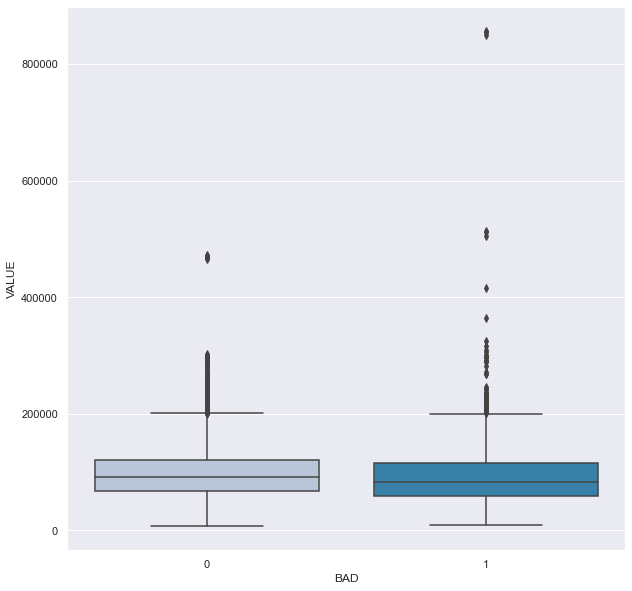

In [42]:
sns.boxplot(data["BAD"],data['VALUE'],palette="PuBu")
rcParams['figure.figsize'] = 10,10

**Insights**
- current value of proprty doesn't seem to differentiate between clients who repaid their loan or defaulted on their loan.
- median is almost the same. 
- Whisker range and IQR appear to be the same almost too
- Both have outliers
- Bad(1) has the greatest range dispersion between min and max values of property value

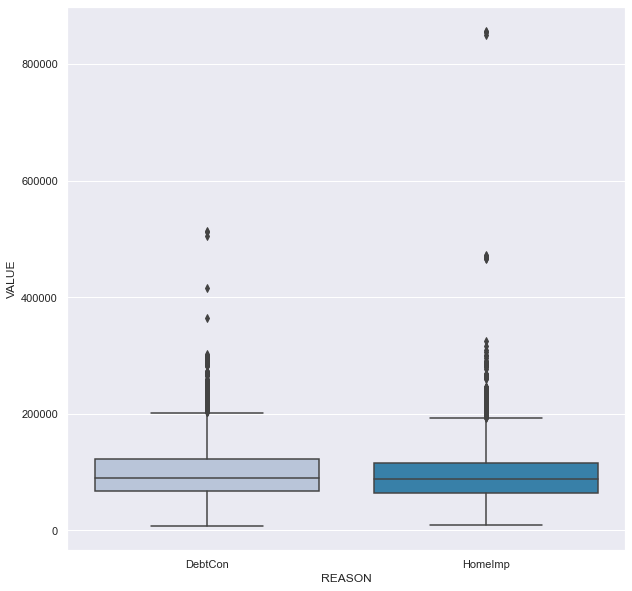

In [43]:
sns.boxplot(data["REASON"],data['VALUE'],palette="PuBu")
rcParams['figure.figsize'] = 10,10

**Insights**
- current value of property to differentiate between the reason for applying for a loan
- Whisker range is almost the same
- IQR for DebtCon in contrast with with property value is greater than HomeImp
- HomeImp has greater outliers for current property value
- HomeImp has the greatest range dispersion between min and max property values


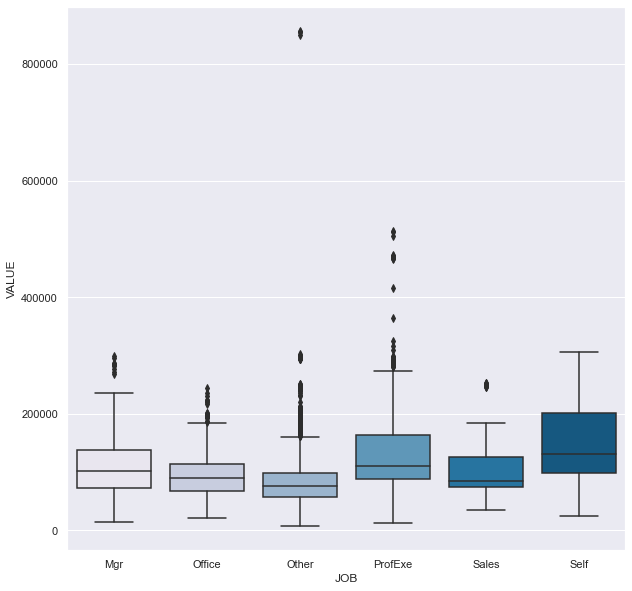

In [44]:
sns.boxplot(data["JOB"],data['VALUE'],palette="PuBu")
rcParams['figure.figsize'] = 10,10

**Insights**
- Self employed people have the highest median property value. Followed by ProfExe and Mgr
- Other has the lowest property value followed by sales
- Other also seems to have smallest IQR
- Self has biggest IQR
- ProfEx has the great property value outliers
- Self employed has no outliers
- Other has the greatest range dispersion between min and max property values

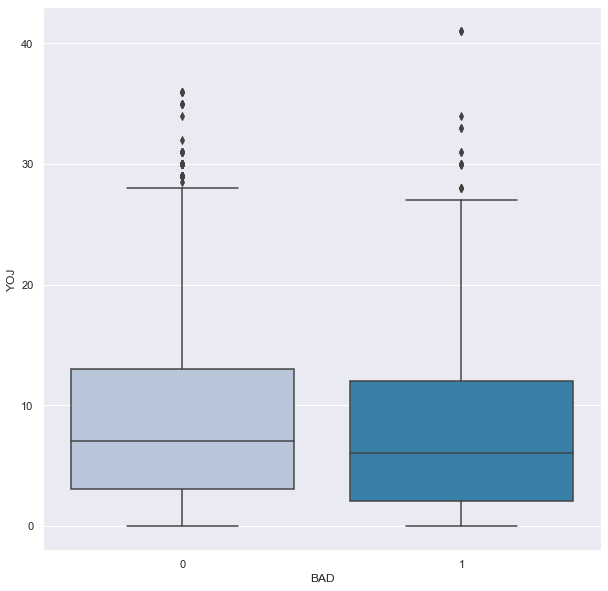

In [45]:
sns.boxplot(data["BAD"],data['YOJ'],palette="PuBu")
rcParams['figure.figsize'] = 10,10

**Insights**
- People who repaid their loan has a higher median for years at current job vs people who defaulted.
- YOJ doesnt seem to affect BAD too much as both BAD(0) and BAD (1) have similar whisker lengths and IQR
- people who defaulted on their loans in contrast with year at present job has a higher value in outliers tho
- BAD (1) has the greatest range dispersion between min and max values

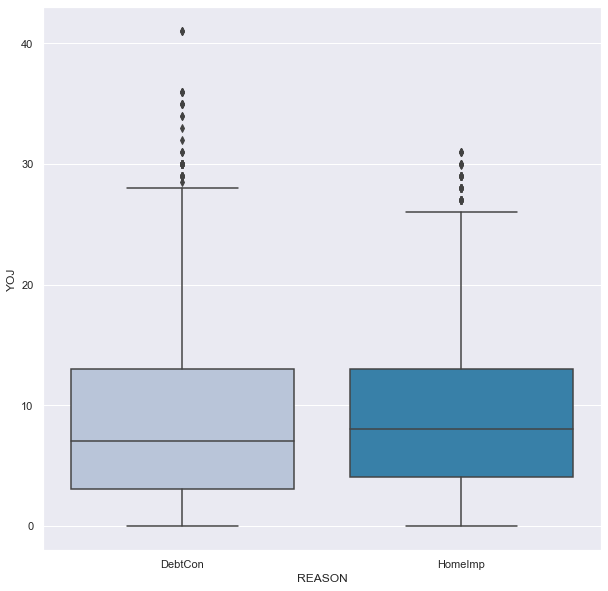

In [46]:
sns.boxplot(data["REASON"],data['YOJ'],palette="PuBu")
rcParams['figure.figsize'] = 10,10

**Insights**
- people who applied for a loan for Home Improvement have a greater median YOJ vs people who applied for a loan for Debt consolidation.
- once again doesnt seem to be a great factor
- IQR for DebtCon is greater than HomeImp
- Whisker range is greater for DebtCon
- Debt con also has great YOJ outliers
- DebtCon has the greatest range dispersion between min and max YOJ


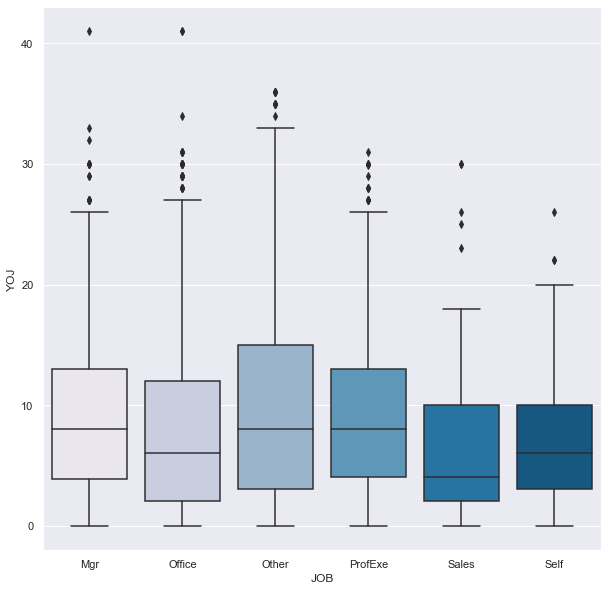

In [47]:
sns.boxplot(data["JOB"],data['YOJ'],palette="PuBu")


rcParams['figure.figsize'] = 15,10

**Insights**
- Other and ProfEx have spent the great median year at their present job
- Sales professionals have spent the lowest median years at their present job
- Office employees and Managers have the greatest max YOJ tho (outliers)- above 40 years for both
- Mgr and Office have the greatest range dispersion between min and max YOJ

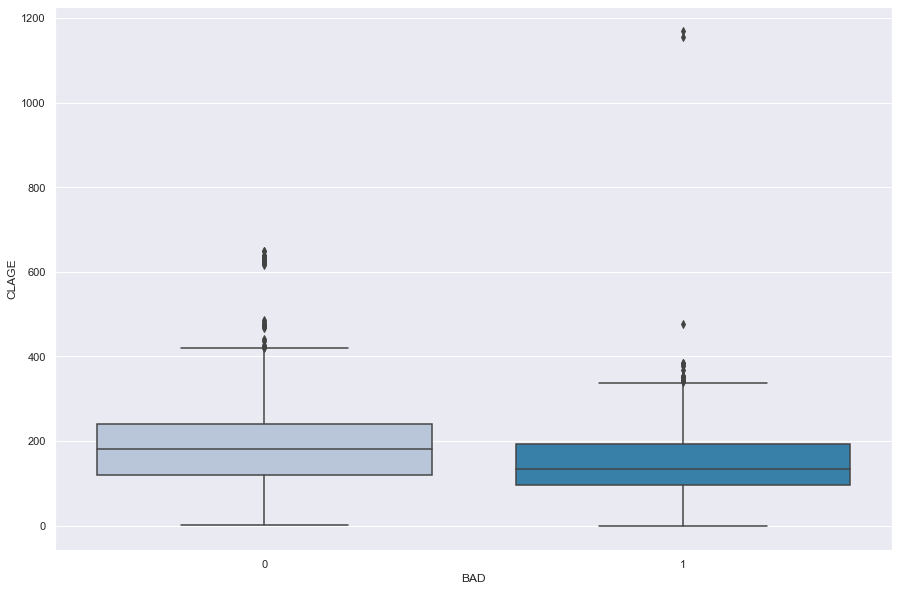

In [48]:
sns.boxplot(data["BAD"],data['CLAGE'],palette="PuBu")


rcParams['figure.figsize'] = 15,10

**Insights**
- people who paid back their loan have greater median of credit line age
- people who defaulted on their loan has a higher max outlier tho. 
- BAD(0) has a great IQR and whisker length
- seems like people who repay their loan close out their credit lines as they also pay back their credit lines
- BAD (1) has greatest CLAGE outlier
- BAD (1) has the greatest range dispersion between min and max CLAGE values

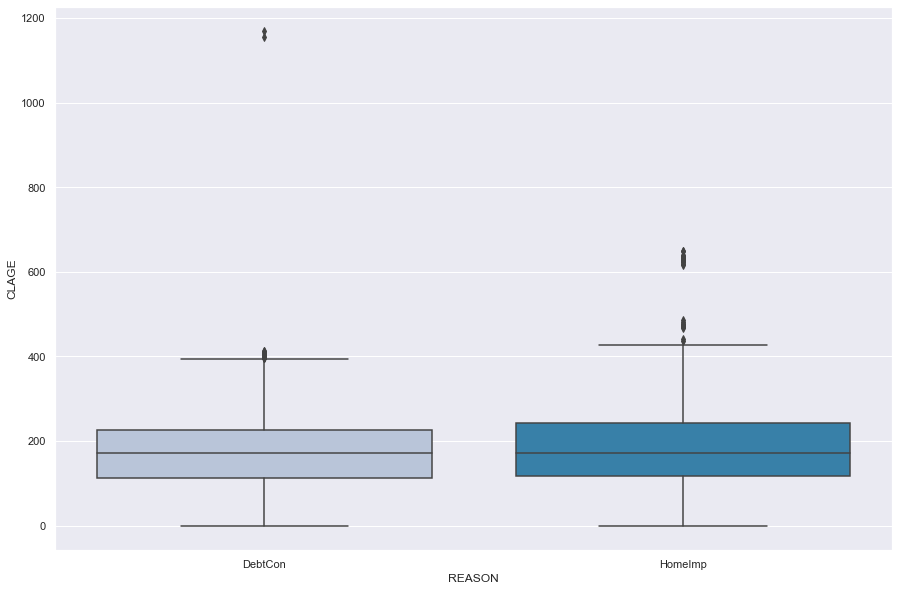

In [49]:
sns.boxplot(data["REASON"],data['CLAGE'],palette="PuBu")


rcParams['figure.figsize'] = 15,10

**Insights**
- Median age of credit line is pretty much the same for both reasons of applying for a loan
- DebtCon has a greater max CLAGE outlier
- seems like people who requested a loan for HomeImprovement also have a credit lines open for longer. Which makes sense cause home improvements take a while sometimes and credit lines are usually open for a longer period of time
- HomeImp has the greatest range dispersion between min and max CLAGE values


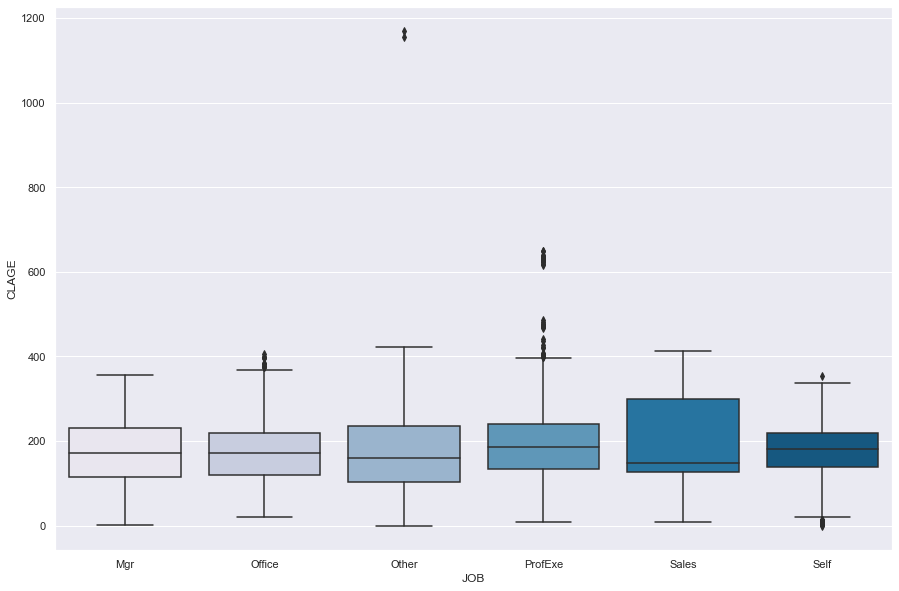

In [50]:
sns.boxplot(data["JOB"],data['CLAGE'],palette="PuBu")


rcParams['figure.figsize'] = 15,10

**Insights**
- Profession Executives and Self employed clients have the greatest median age of credit line
- Sales professionals have the lowest median age of their credit lines
- ProfExe has many outliers
- Sales, Other, and Mgr have no outliers
- Sales has the biggest IQR
- profExe has the greatest range dispersion between min and max CLAGE values

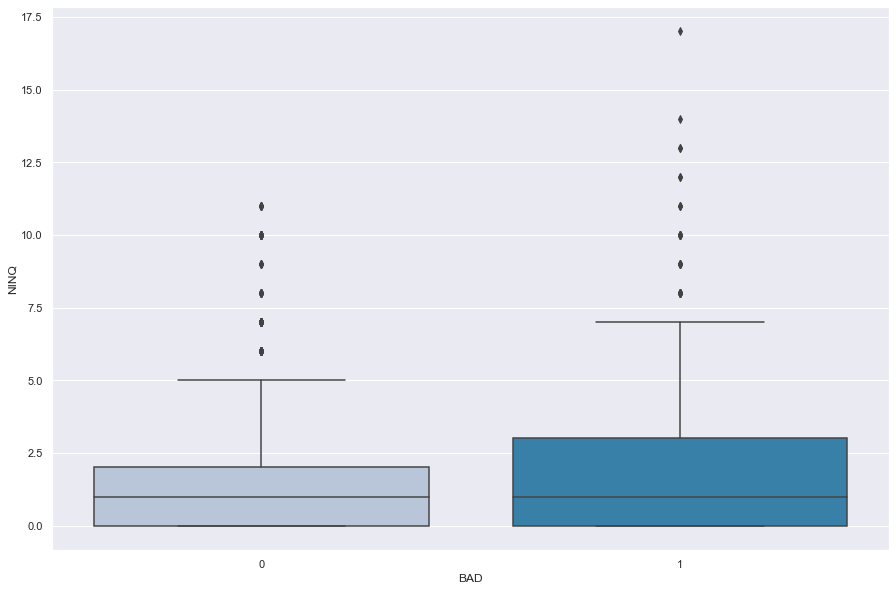

In [51]:
sns.boxplot(data["BAD"],data['NINQ'],palette="PuBu")


rcParams['figure.figsize'] = 15,10

**Insights**
- both BAD (0) and BAD (1) have no lower whisker in contrast with number of recent inquiries
- median is about the same for both
- BAD(1) has a greater IQR range
- BAD(1) also has great max outliers which makes sense. People who defaulted on their loans have had their redit inquiries made more as it shows they can repay back their debt. 
- BAD (1) has the greatest range dispersion between min and max number of inquiries

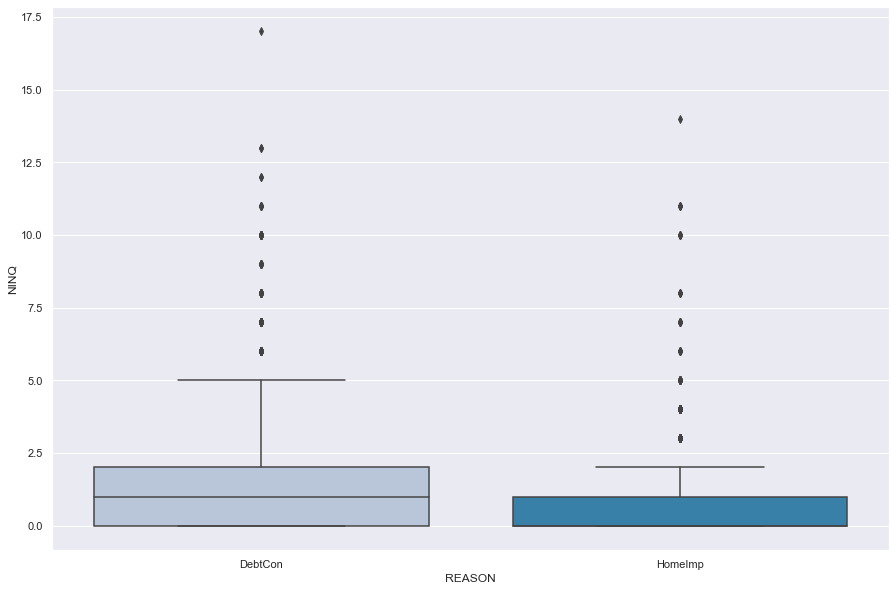

In [52]:
sns.boxplot(data["REASON"],data['NINQ'],palette="PuBu")


rcParams['figure.figsize'] = 15,10

**Insights**
- Debtcon has has the greatest range dispersion between min and max values of NINQ
- HomeImp has very low median
- Debtcon has greater IQR
- both have no lower whisker
- people who apply for loan to make debt consolidations also have more inquiries made, which makes sense because they are trying to pay off debt using more debt. While HomeImp you can use your house or mrtgage as collateral.

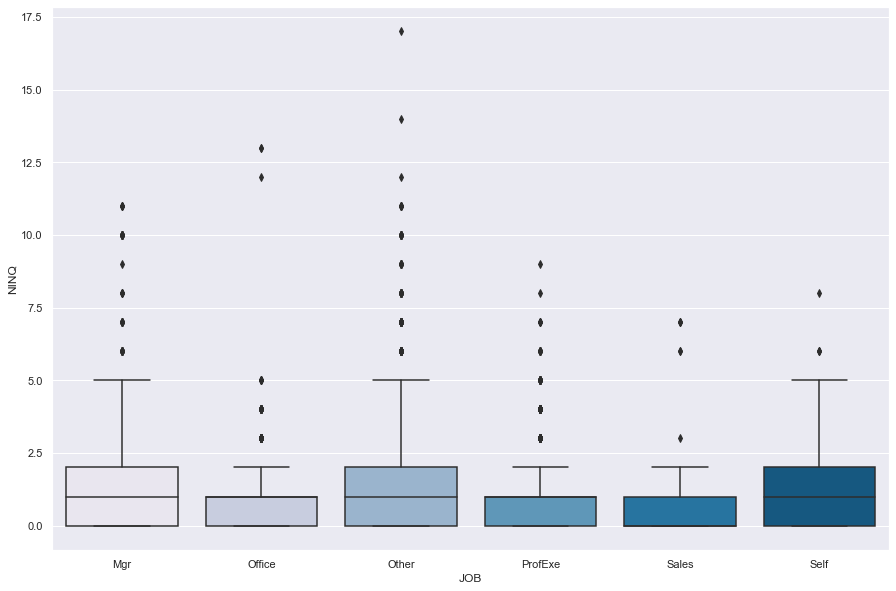

In [53]:
sns.boxplot(data["JOB"],data['NINQ'],palette="PuBu")


rcParams['figure.figsize'] = 15,10

**Insights**
- No lower whisker for all job types
- Other has the greatest range dispersion between min and max values of NINQ


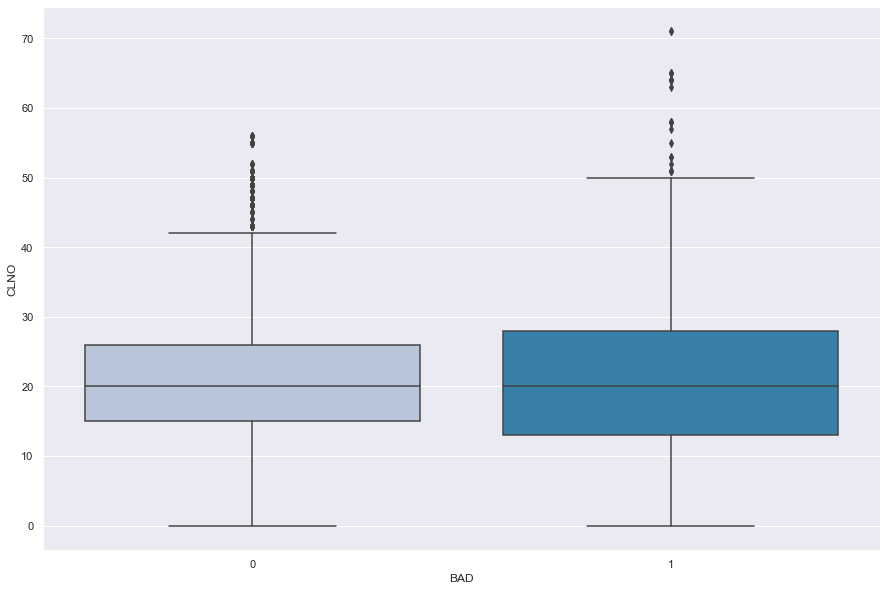

In [54]:
sns.boxplot(data["BAD"],data['CLNO'],palette="PuBu")


rcParams['figure.figsize'] = 15,10

**Insights**
- both BAD 0 and 1 have similar median number of credit lines
- IQR is a bit bigger for clients who defaulted on their loan
- clients who defaulted on loan have greatest range dispersion between min and max values

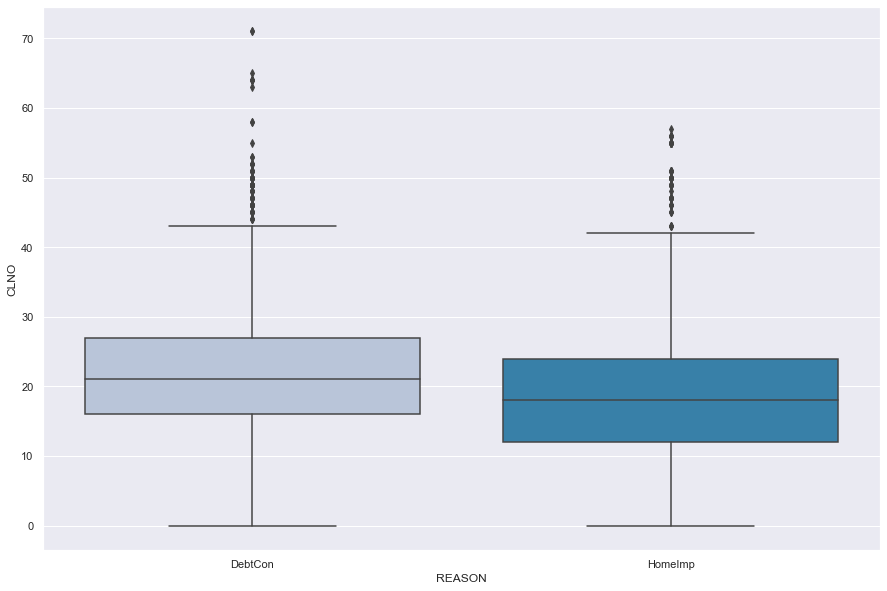

In [55]:
sns.boxplot(data["REASON"],data['CLNO'],palette="PuBu")


rcParams['figure.figsize'] = 15,10

**Insights**
- DebtCon REASON has the greatest range dispersion between min and max values
- DebtCon has greater median number of credit lines vs HomeImp
- seems like clients who apply to get a loa for deb consolidation already have more exisiting credit lines


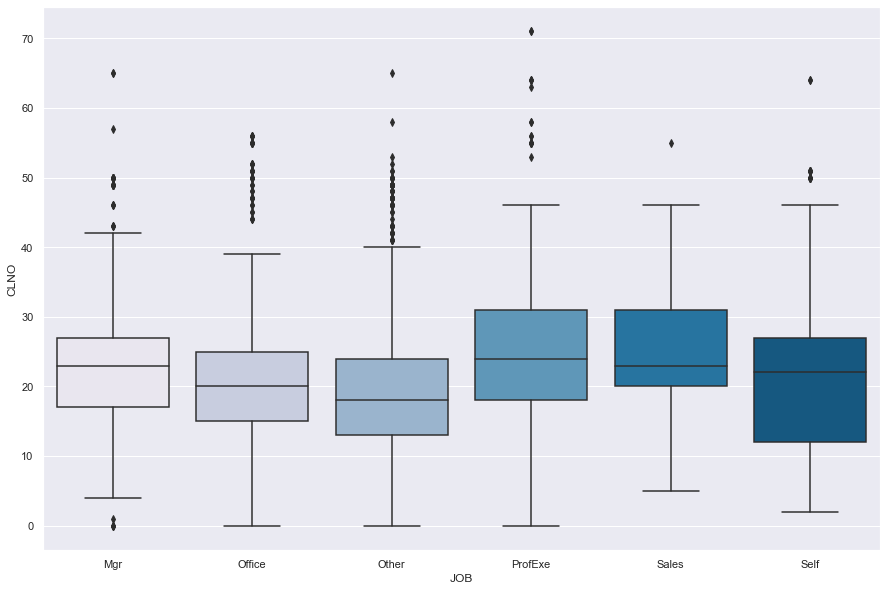

In [56]:
sns.boxplot(data["JOB"],data['CLNO'],palette="PuBu")


rcParams['figure.figsize'] = 15,10

**Insights**
- JOB type ProfExe has the greatest median number of credit lines
- ProfEx also has the greatest range dispersion between min and max values
- Other has lowest median number of credit lines
- Mgr has outliers both above and below the whiskers


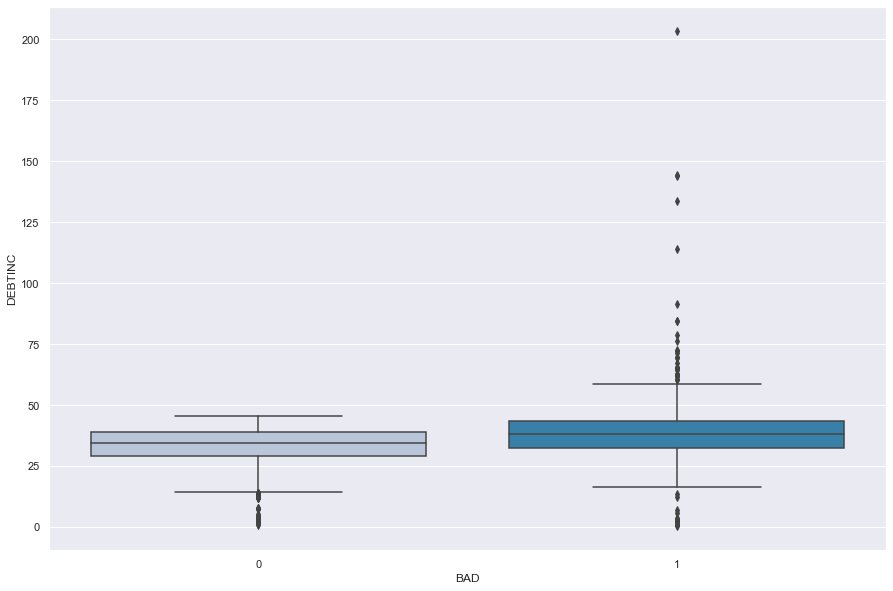

In [57]:
sns.boxplot(data["BAD"],data['DEBTINC'],palette="PuBu")


rcParams['figure.figsize'] = 15,10

**Insights**
- BAD (0) has outliers below lower whisker but no outliers past upper whisker
- BAD(1) has outliers both below and above whiskers
- BAD(1) has has the greatest range dispersion between min and max debt-icnome rations
- median is higher for client who deafaulted on their loan, makes sense because they have greater debt and a lower monthly income


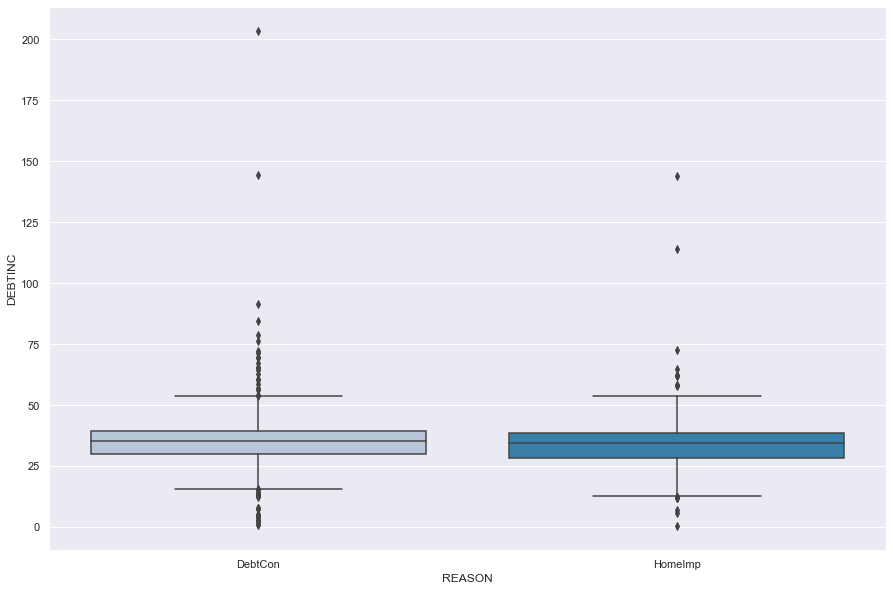

In [58]:
sns.boxplot(data["REASON"],data['DEBTINC'],palette="PuBu")


rcParams['figure.figsize'] = 15,10

**Insights**
-   DebtCon has the greatest range dispersion between min and max debt-income ratios
- both have very small IQR
- both have outliers above and below whiskers


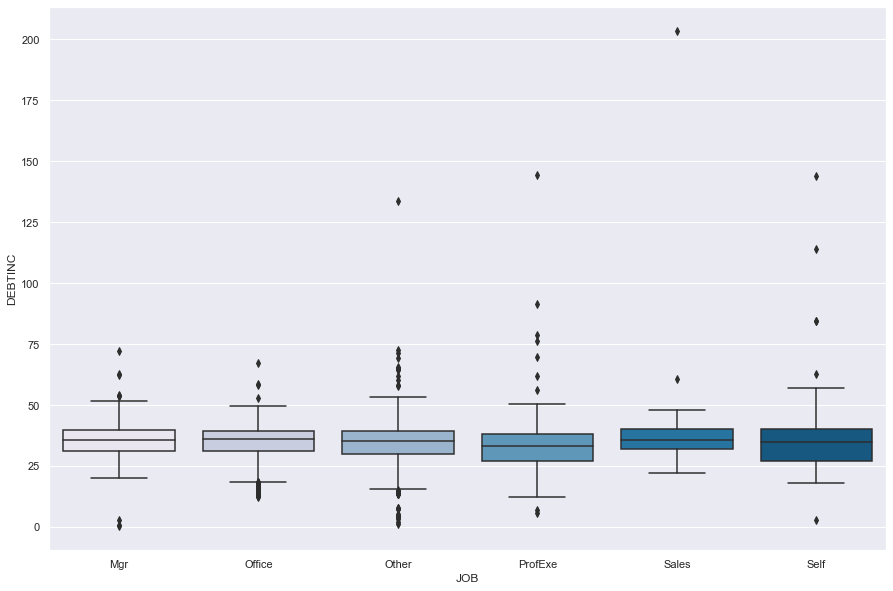

In [59]:
sns.boxplot(data["JOB"],data['DEBTINC'],palette="PuBu")


rcParams['figure.figsize'] = 15,10

**Insights**
- As expected sale sprofessionals have greatest outlier for Debt-income ratio. They make the least amount of money and have a lof of debt. They have the highest median among other job titles . Although the median is very close for all job titles
- Sales has no outliers under the lower whisker
- Sales professionals has the greatest range dispersion between min and max values
- ProfExe and Mgrs have the least debt-income ratio because they have the highest income and are able to pay off their debts
- all job titles other than Sales have outliers above and below whiskers


*NOTES*

**Bivariate Analysis: Continuous/Discrete numerical variables and Categorical Variables perfromed above.** 

**LOAN, MORTDUE, and VALUE are the only continous variables.**

**Although DELINQ and DEROG are numerical variables, it is between a very small bound (0-9) so we can convert it or think of it as a categorical variable**

### **Bivariate Analysis: Two Continuous Variables**

<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

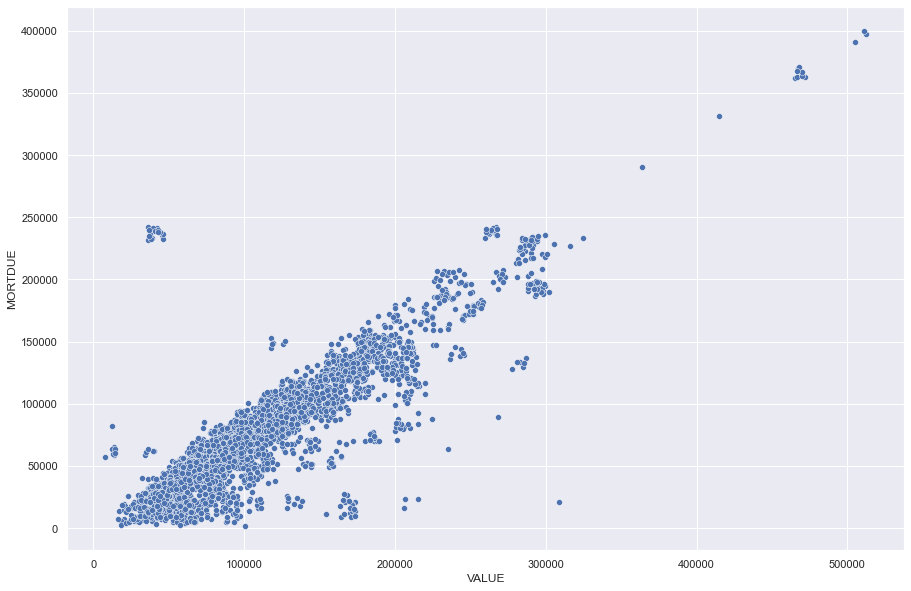

In [60]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu")

**Insights:**
- As current property value increases so does amount on existing mortgage. Makes sense because higher the value of a house usually the more mortagage a client has to take if they did not put enough downpayment.
- postive upward trend
- there are some outliers


<AxesSubplot:xlabel='LOAN', ylabel='MORTDUE'>

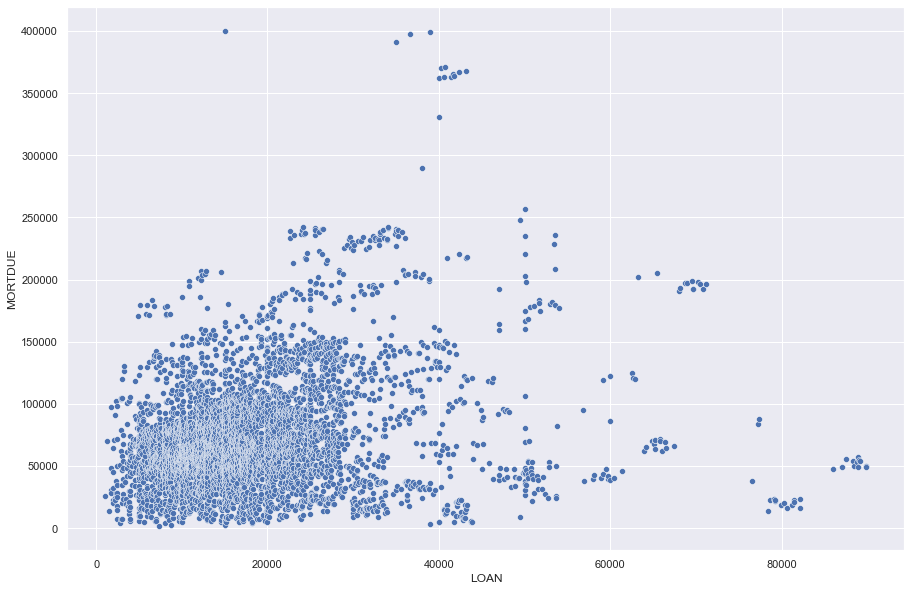

In [61]:
sns.scatterplot(data["LOAN"],data['MORTDUE'],palette="PuBu")

**Insights**
- no distinct trend
- majority of the data is clustered around loans below 40,000 and morgage amounts under 200,000


<AxesSubplot:xlabel='LOAN', ylabel='VALUE'>

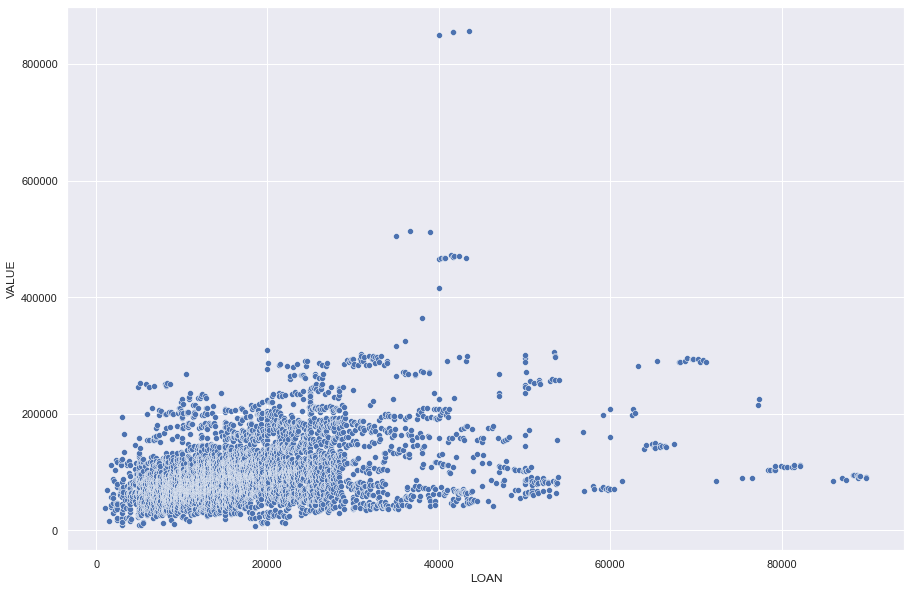

In [62]:
sns.scatterplot(data["LOAN"],data['VALUE'],palette="PuBu")

**Insights**
- no significant trend
- you would think the higher the property value the higher the amount of loan is approved as it can be shown as a collateral or how well off a client is. If they can afford to buy a big house that costs more they should be able to repay backtheir loan.

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [63]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


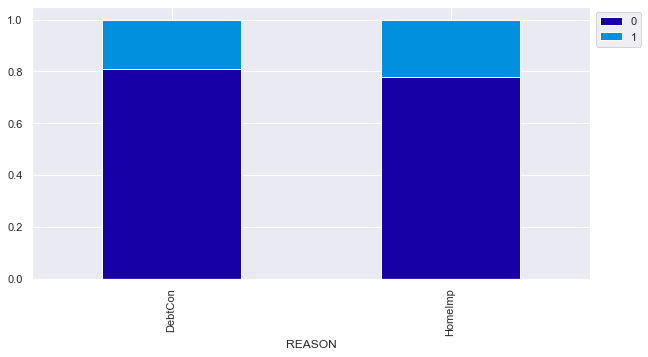

In [64]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Insights**
- despite the reason, value of BAD (1) or clients who deafulted is low. Higher ratio of clients repaid their loan despite reason
- overall from all the cients who gave their REASON (5708), 4567 clients repaid there loan

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


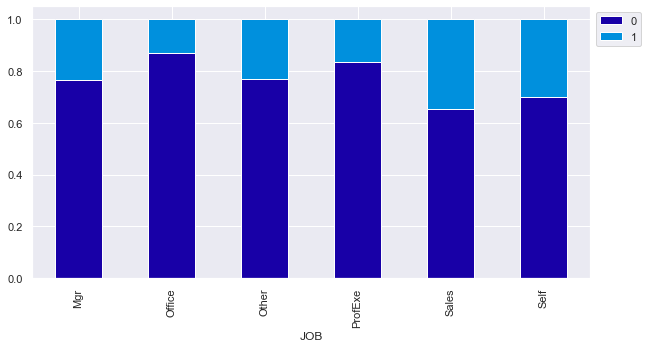

In [65]:
stacked_plot(data['JOB'])


**Insights**
- Sales professionals loan default ratio is the most compared to other job titles. 38/109=34%
- sales doesnt have too much data
- majority of the data is under Other and ProfEx
- Office profesiionals and ProfEx default ratio is the least. 

Below is loan default ratio

- Office = 125/948 = ~13%
- ProfEx = 212/1276= ~17%
- Other= 554/2388= ~23%

Office has best loan paid ratio = 823/948= ~87%

In [66]:
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['REASON'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['REASON'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()
    
#REASON vs categorical Variables

REASON   DebtCon  HomeImp   All
JOB                            
Mgr          572      174   746
Office       620      301   921
Other       1604      716  2320
ProfExe      847      405  1252
Sales         97       12   109
Self          73      115   188
All         3813     1723  5536
------------------------------------------------------------------------------------------------------------------------


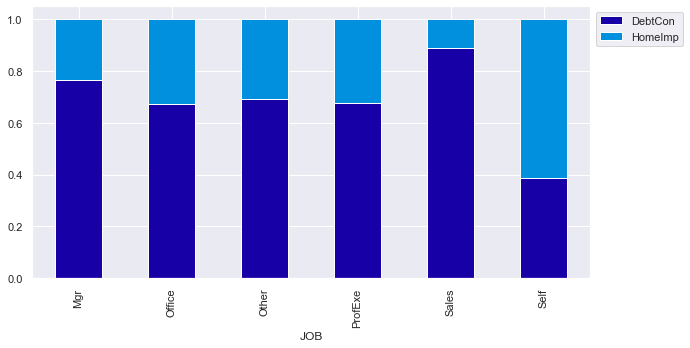

In [67]:
stacked_plot(data['JOB'])

**Insights**
- In total more number of chosen job professionals (3813) requested a loan for the reason of debt consolidation vs 1723 people requested a loan for the reason of HomeImprovement.
- Self was the only JOB category in which more people requested a loan for the reason of Home Improvement
- SALES prfessionals had the highest percentage for reason DebtCon. 97/109=89%. Once again SALES also has the least amount of total entries so that does make a difference.

REASON  DebtCon  HomeImp   All
BAD                           
0          3183     1384  4567
1           745      396  1141
All        3928     1780  5708
------------------------------------------------------------------------------------------------------------------------


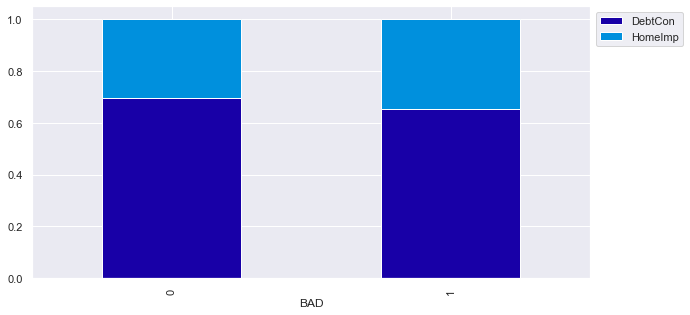

In [68]:
stacked_plot(data['BAD'])

**Insights**
- whether a client defaulted on a loan or not, higher percentage of people (3928/5708) requested a loan for debt consolidation reasons

In [69]:
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['JOB'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['JOB'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()
    
#JOB vs categorical Variables

JOB  Mgr  Office  Other  ProfExe  Sales  Self   All
BAD                                                
0    588     823   1834     1064     71   135  4515
1    179     125    554      212     38    58  1166
All  767     948   2388     1276    109   193  5681
------------------------------------------------------------------------------------------------------------------------


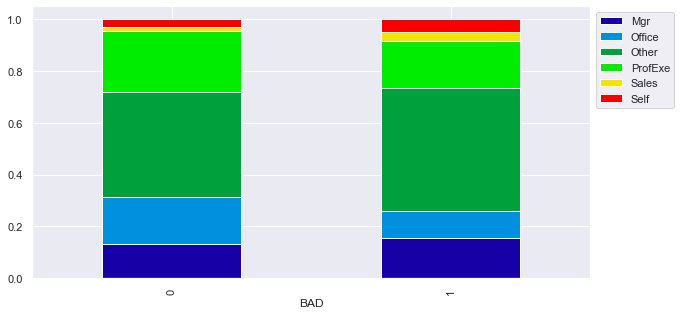

In [70]:
stacked_plot(data['BAD'])

**Insights**
- in terms of count job type OTHER has the highest amount for both loan defaulted or loan repaid
- all JOB(s) have greater count for loan repaid (BAD-0). 4515/5681 = ~80%
- ratio wise SALES has the highest perentage of people defaulting (38/109= ~34%)

JOB      Mgr  Office  Other  ProfExe  Sales  Self   All
REASON                                                 
DebtCon  572     620   1604      847     97    73  3813
HomeImp  174     301    716      405     12   115  1723
All      746     921   2320     1252    109   188  5536
------------------------------------------------------------------------------------------------------------------------


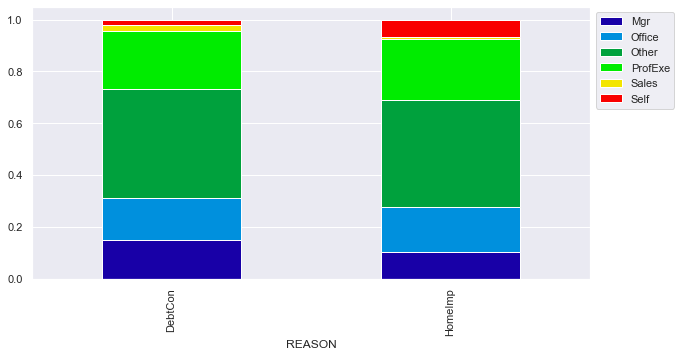

In [71]:
stacked_plot(data['REASON'])

**Insights**
- in total from all the chosen job types 3813 out of 5536 people chose REASON: DebtCon
-  in total from all the chosen job types 1723 out of 5536 people chose REASON: HomeImp
- ratio wise people who chose JOB:OTHER, ~69% of them (1604/2320) took out a loan for REASON DEBTCon. 
- highest ratio for DebtCon was with Job:Sales (97/109)
- highest ratio for HomeImp wa with Job:Self(115/188)

In [72]:
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['DEROG'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['DEROG'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()
    
#DEROG vs categorical Variables

DEROG     0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0   All
REASON                                                                
DebtCon  2987  302  106   39   17    9   10    5    4    1     1  3481
HomeImp  1413  114   48   18    5    5    5    1    2    1     1  1613
All      4400  416  154   57   22   14   15    6    6    2     2  5094
------------------------------------------------------------------------------------------------------------------------


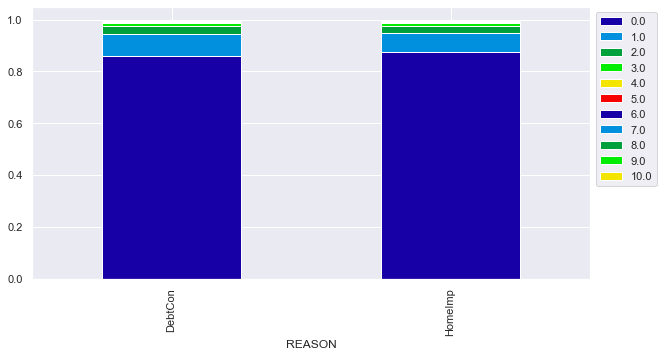

In [73]:
stacked_plot(data['REASON'])

**Insights**

DEROG   0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0   All
BAD                                                                 
0      3773  266   78   15    5    8    5    0    0    0     0  4150
1       754  169   82   43   18    7   10    8    6    3     2  1102
All    4527  435  160   58   23   15   15    8    6    3     2  5252
------------------------------------------------------------------------------------------------------------------------


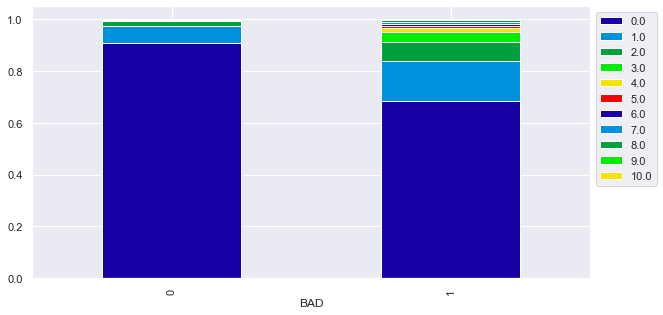

In [74]:
stacked_plot(data['BAD'])

**Insights**
- whether client defaulted or not majority had 0 deregatory reports
- ratio wise under few cateogries of deregotory reports (e.g. 7) only people who defaulted (BAD 1) accounted for all or majority of derogatory report. If you look at DEROG=7--> BAD(0) had 0 under it, and BAD(1) had 8. So 8 people who defaulted on their loan had 7 deragatory reports. 
- for any DEROG besides 0 and 1, the values under BAD1 are greater. Makes sense because more chances for a client who defaulted to have more derogatory reports.

DEROG     0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0   All
JOB                                                                   
Mgr       541   72   26    6    4    2    0    3    3    1     0   658
Office    763   42   21   11    0    2    0    0    0    0     0   839
Other    1809  193   79   25    9    9   10    1    3    2     2  2142
ProfExe  1070   77   22   11    4    1    4    3    0    0     0  1192
Sales      77    9    7    3    3    0    0    0    0    0     0    99
Self      154   26    4    2    1    0    0    0    0    0     0   187
All      4414  419  159   58   21   14   14    7    6    3     2  5117
------------------------------------------------------------------------------------------------------------------------


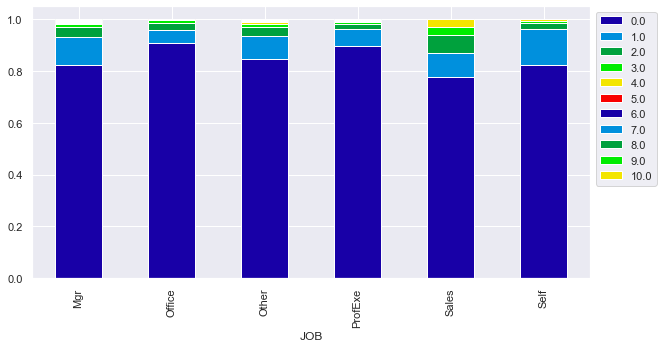

In [75]:
stacked_plot(data['JOB'])

**Insights**
- OTHER accounts for most of the higher and lower DEROGATRY report counts, which makes total sense cuz people didn't have too many options to chose from so they chose OTHER.
- besides OTHER, MGR had the highest amount of greater DEROGS. Under 7 DEROG there were 3 Mgrs, under 8 DEROG there was also 3, and under 9 there was 1.

In [76]:
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['DELINQ'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['DELINQ'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()
    
#DELINQ vs categorical Variables

DELINQ   0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  10.0  11.0  12.0  13.0  \
BAD                                                                            
0       3596  432  138   58   32    7    0    0    0     0     0     0     0   
1        583  222  112   71   46   31   27   13    5     2     2     1     1   
All     4179  654  250  129   78   38   27   13    5     2     2     1     1   

DELINQ  15.0   All  
BAD                 
0          0  4263  
1          1  1117  
All        1  5380  
------------------------------------------------------------------------------------------------------------------------


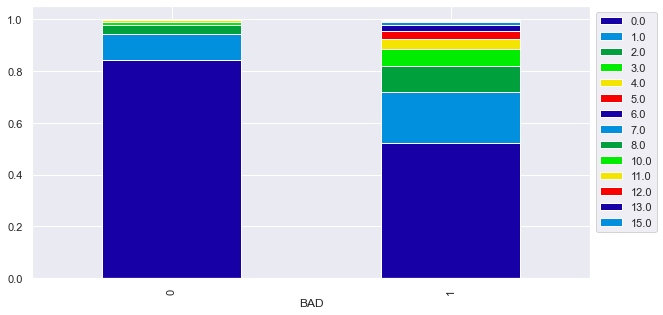

In [77]:
stacked_plot(data['BAD'])

**Insights**
- after DELINQ 0 and 1 and 2, BAD-1 clients had more delinquencies vs BAD-0
- BAD-1 accounts for all deliquencies past 5.
- you can say its not fair to judge if a client would default or not with any DELINQ of 5 or under. It is common for both types of clients.

DELINQ    0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  10.0  11.0  12.0  13.0  \
REASON                                                                          
DebtCon  2810  444  148   80   53   24   19    8    2     2     2     1     1   
HomeImp  1254  198   98   40   16    8    7    5    3     0     0     0     0   
All      4064  642  246  120   69   32   26   13    5     2     2     1     1   

DELINQ   15.0   All  
REASON               
DebtCon     0  3594  
HomeImp     1  1630  
All         1  5224  
------------------------------------------------------------------------------------------------------------------------


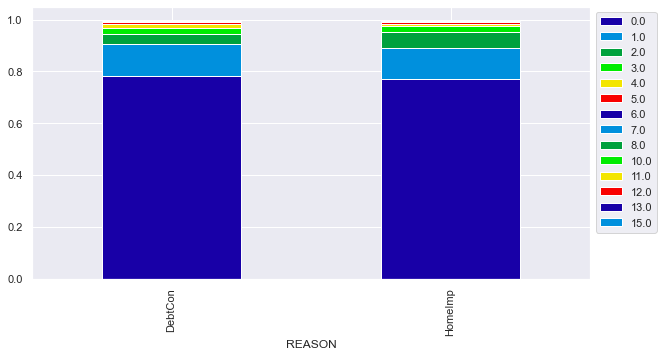

In [78]:
stacked_plot(data['REASON'])

**Insights**
- clients with REASON of loan request DEBTCon have more number of DELIQUNCIES under each DELINQ category
- clients who requested loan for HomeImp dont reach more than 8 deliquencies

DELINQ    0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  10.0  11.0  12.0  13.0  \
JOB                                                                             
Mgr       502   87   43   20   25   13    5    0    0     0     1     0     0   
Office    677  110   37   27   12    7    4    0    0     0     0     1     1   
Other    1668  285  102   53   17    7   12    4    3     2     1     0     0   
ProfExe   977  132   52   22   20    8    5    6    2     0     0     0     0   
Sales      89    7    8    0    0    0    0    1    0     0     0     0     0   
Self      141   16    7    4    4    2    1    2    0     0     0     0     0   
All      4054  637  249  126   78   37   27   13    5     2     2     1     1   

DELINQ   15.0   All  
JOB                  
Mgr         0   696  
Office      0   876  
Other       0  2154  
ProfExe     0  1224  
Sales       0   105  
Self        1   178  
All         1  5233  
------------------------------------------------------------------------

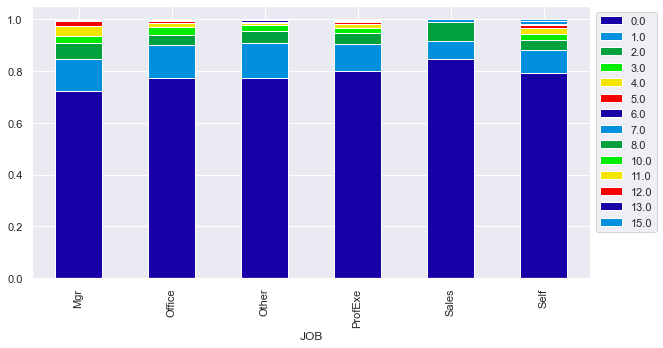

In [79]:
stacked_plot(data['JOB'])

**Insights**
- out of 5233 people, 178 chose JOB:SELF, and one of those SELF had 15 delinquencies
- SALES doesn't have more than 2 deliquencies
- OTHER has the most deliquencies


### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

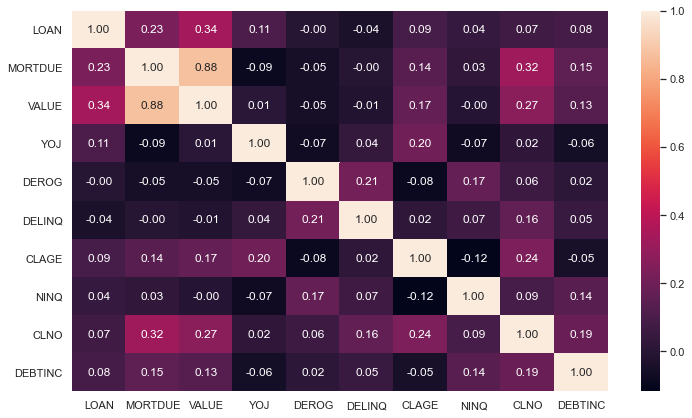

In [80]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

**Insights**
- VALUE and MORTDUE are highly postively correlated (0.88). Makes sense cuz higher the property value, most likely the higher the amount of mortgage will be, that of course restrictions apply such as downpayment amount
- MORTDUE and VALUE are correlated slightly with LOAN
- MORTDUE and CLNO are slightly correlated. People who generally have a mortage have mutliple credit lines attached with the Mortgage.
- CLNO and VALUE as well. 
- No significant negative correlations

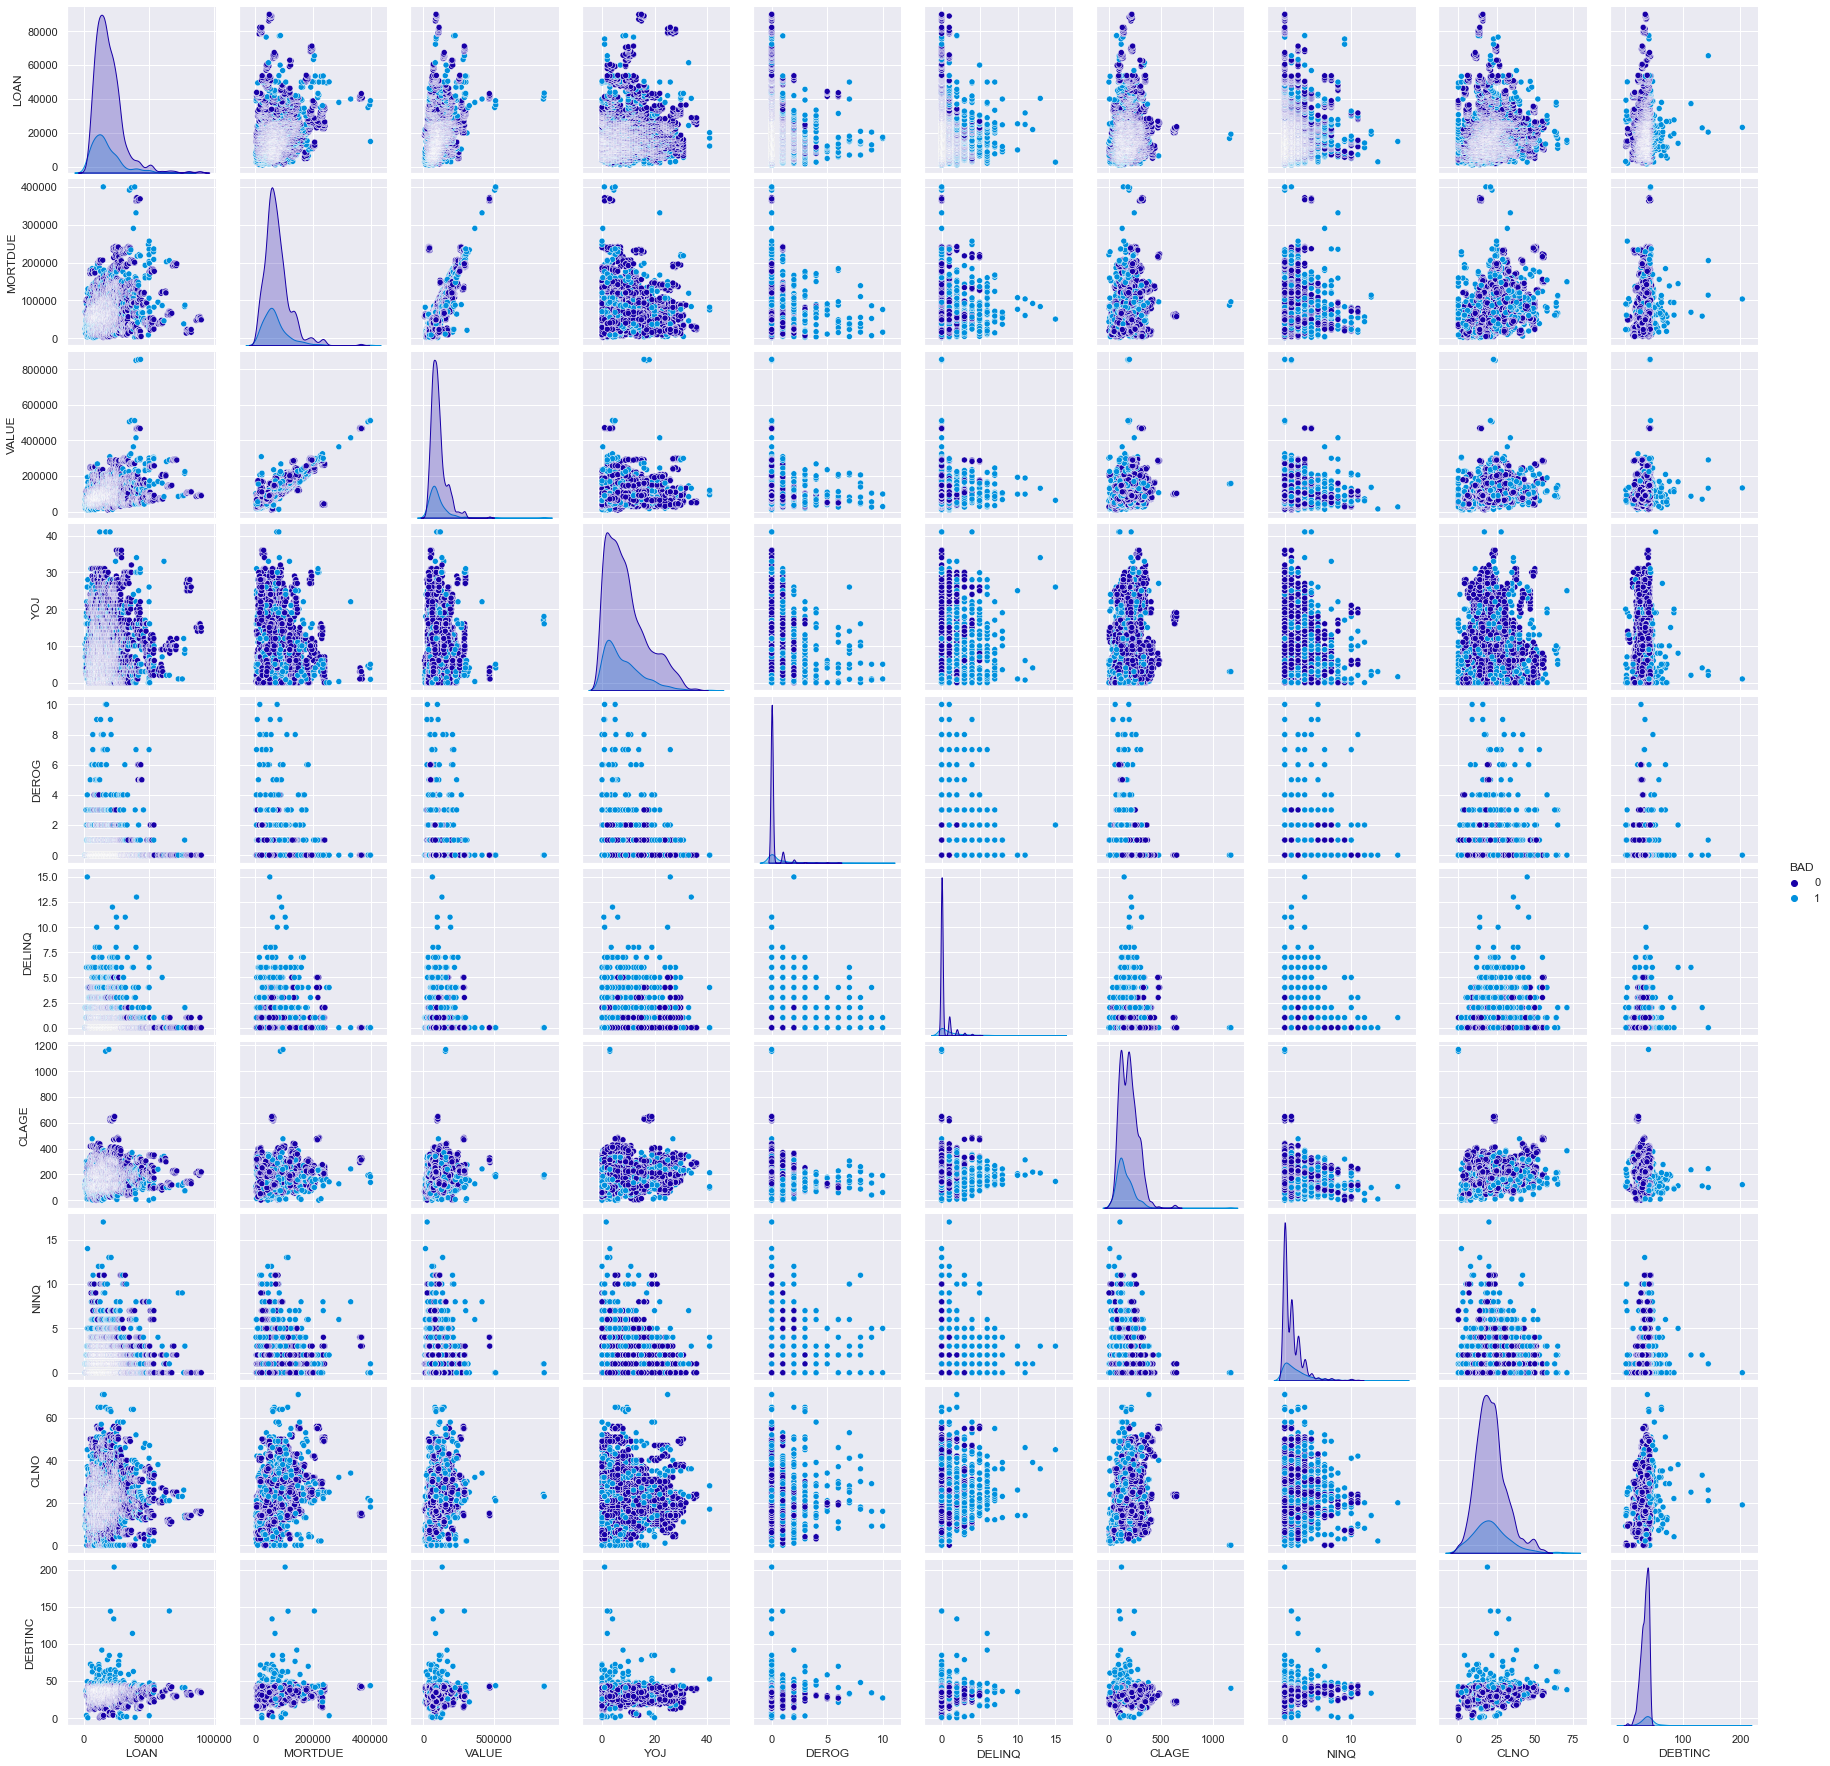

In [81]:
# Build pairplot for the data with hue = 'BAD'
sns.pairplot(data, hue="BAD")
plt.show()

### **Think about it**
- Are there missing values and outliers in the dataset? If yes, how can you treat them? 
- Can you think of different ways in which this can be done and when to treat these outliers or not?
- Can we create new features based on Missing values?

#### Treating Outliers

In [82]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1   #IQR range
    Lower_Whisker = (Q1 - 1.5*IQR) #define lower whisker
    Upper_Whisker = (Q3 + 1.5*IQR) #define Upper whisker
    
    
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                             # and all the values above upper_whishker will be assigned value of upper_Whisker 
    
    
    return df


def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [83]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist() # getting list of numerical columns

df= treat_outliers_all(df_raw,numerical_col)



#### Adding new columns in the dataset for each column which has missing values 

In [84]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [85]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)


#### Filling missing values in numerical columns with median and mode in categorical variables

In [86]:
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.

df[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.

for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)
    


In [87]:
df.isna().sum() 

BAD                            0
LOAN                           0
MORTDUE                        0
VALUE                          0
REASON                         0
JOB                            0
YOJ                            0
DEROG                          0
DELINQ                         0
CLAGE                          0
NINQ                           0
CLNO                           0
DEBTINC                        0
MORTDUE_missing_values_flag    0
VALUE_missing_values_flag      0
REASON_missing_values_flag     0
JOB_missing_values_flag        0
YOJ_missing_values_flag        0
DEROG_missing_values_flag      0
DELINQ_missing_values_flag     0
CLAGE_missing_values_flag      0
NINQ_missing_values_flag       0
CLNO_missing_values_flag       0
DEBTINC_missing_values_flag    0
dtype: int64

- All missing values in numerical categories have been replaced with their medians
- All missing values in categorical categories have been replaced with their mode.

## **Proposed approach**
**1. Potential techniques** - What different techniques should be explored?

**2. Overall solution design** - What is the potential solution design?

**3. Measures of success** - What are the key measures of success?

### See presentation slide for Proposed Approach Section

# **Milestone 2**


## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**

### **Separating the target variable from other variables**

In [88]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X=df.drop(columns = ['BAD'])

In [89]:
# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X, drop_first=True)



In [90]:
# Create y(dependent varibale)
Y= data.BAD


### **Splitting the data into 70% train and 30% test set**

In [91]:
# Split the data into training and test set
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.30, random_state=42)


In [92]:
print(X_train.shape, X_test.shape)


(4172, 27) (1788, 27)


In [93]:
print(y_train.shape, y_test.shape)


(4172,) (1788,)


### **Think about it** 
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the data is imbalanced, can you make the split more balanced and if yes, how?

In [94]:
df.drop(['MORTDUE_missing_values_flag', 'VALUE_missing_values_flag', 'REASON_missing_values_flag','JOB_missing_values_flag', 'YOJ_missing_values_flag', 'DEROG_missing_values_flag', 'DELINQ_missing_values_flag', 'CLAGE_missing_values_flag', 'NINQ_missing_values_flag','CLNO_missing_values_flag', 'DEBTINC_missing_values_flag'], axis=1)

BAD   LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0      1   1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1      1   1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     0.0   
2      1   1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3      1   1500  65019.0   89235.5  DebtCon   Other   7.0    0.0     0.0   
4      0   1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
...   ..    ...      ...       ...      ...     ...   ...    ...     ...   
5955   0  41600  57264.0   90185.0  DebtCon   Other  16.0    0.0     0.0   
5956   0  41600  54576.0   92937.0  DebtCon   Other  16.0    0.0     0.0   
5957   0  41600  54045.0   92924.0  DebtCon   Other  15.0    0.0     0.0   
5958   0  41600  50370.0   91861.0  DebtCon   Other  14.0    0.0     0.0   
5959   0  41600  48811.0   88934.0  DebtCon   Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
0      94.366667   1.0   9.0  34.818262  
1     121.833333   0.0  14.0  34.818262  
2     149.466667   1.0  10.0  34.818262  
3     173.466667   1.0  20.0  34.818262  
4      93.333333   0.0  14.0  34.818262  
...          ...   ...   ...        ...  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519  

[5960 rows x 13 columns]

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

#### We shall build 6 types of models. Logistic Regression, Logistic Regression with Optimized Threshold, Decision Tree, Tuned Decision Tree with Hyperparameters, Random Forest, and Tuned Random Forest with Hyperparameters. For each models test set we will calculate the total cost of the model using cost matrix. Cost Matrix is similar of confusion matrix except we only look at True Positives and True Negatives as they are correctly identified. We are also estimating cost on test data because its what predicts on new data that comes in after the model has been built.

#### Remember  1 = Client defaulted on loan, 0 = loan repaid
 
**total Cost = C(FN)xFN + C(FP)xFP where,**

FN is the number of positive observations wrongly predicted. So Predicting the customer will pay back their loan but they end up defaulting **

FP is the number of negative examples wrongly predicted. So precting the customer will not pay back their loan and they do

C is the cost associated with each

**The goal of this method is to choose a classifier with lowest total cost. When we minimize the Cost Function, we minimize the error, and consequently, improve the performance of our Model.**

Remember, C(FN) > C(FP) as our goal is too minimize false negatives.

**We shall assume,
cost_of_false_negatives = 10000 dollars/units (This is random amount we will assume as the principle of the loan that defaulted)
cost_of_false_postive = 10,000*0.05 (This is the profit the bank would make on the interest of the loan, so 5%, that was paid back)**

Banks can adjust as per their needs

In [95]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Loan Defaulted', 'Paid'], yticklabels=['Loan Defaulted', 'Paid'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** 

In [96]:
# Defining the Logistic regression model
log_reg= LogisticRegression()

# Fitting the model on the training data 

log_reg.fit(X_train,y_train)

LogisticRegression()

#### Checking the performance on the train dataset

In [97]:
#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve




              precision    recall  f1-score   support

           0       0.81      1.00      0.90      3382
           1       0.00      0.00      0.00       790

    accuracy                           0.81      4172
   macro avg       0.41      0.50      0.45      4172
weighted avg       0.66      0.81      0.73      4172



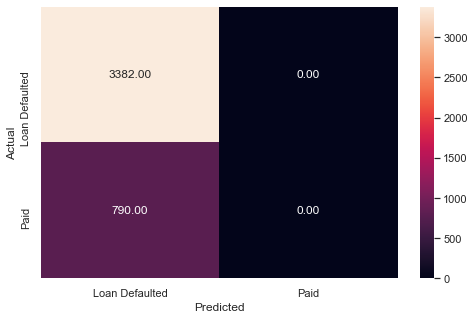

In [98]:
# Checking performance on the training data
y_pred_train = log_reg.predict(X_train)
metrics_score(y_train, y_pred_train)

**Reading confusion matrix:** 1- loan default is positive . 0-loan repaid is negative

**True Positive**: Predicting the customer will not pay back their loan and they dont

**False Negative**: Predicting the customer will pay back their loan but they end up defaulting

**True Negative**: Predicting the customer will pay back their loan and they do

**False Positive**: Predicting the customer will not pay back their loan and they do

**Insights**

- There is absolutely 100% recall for BAD-0 (Loan paid). So model reduced False Negatives perfectly. The logistic regression model on the train data predicts 0 people paid their loan when they actually defaulted.
- The logistic regresion model on the train data predicts 0 people paid back there loan when they actually did. This was with only 81% precision.
- The logistic regression model on the train data predicts 3382 people out of 4172 defaulted on their loan when they actually defaulted. Which is great but the model did this with 0% precision.
- model is overfitting


              precision    recall  f1-score   support

           0       0.78      1.00      0.87      1389
           1       0.00      0.00      0.00       399

    accuracy                           0.78      1788
   macro avg       0.39      0.50      0.44      1788
weighted avg       0.60      0.78      0.68      1788



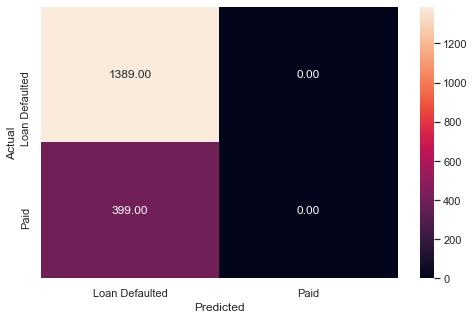

In [99]:
y_pred_test = log_reg.predict(X_test)
metrics_score(y_test, y_pred_test)

**Reading confusion matrix:** 1- loan default is positive . 0-loan repaid is negative

**True Positive**: Predicting the customer will not pay back their loan and they dont

**False Negative**: Predicting the customer will pay back their loan but they end up defaulting

**True Negative**: Predicting the customer will pay back their loan and they do

**False Positive**: Predicting the customer will not back their loan and they do

**Insights**
- very similar to test data
- There is absolutely 100% recall for BAD-0 (Loan paid). So model reduced False Negatives perfectly. The logistic regression model on the train data predicts 0 people paid their loan when they actually defaulted. This is prob due to overfitting data
- The logistic regresion model on the train data predicts 0 people paid back there loan when they actually did. This was with only 78% precision. This is not an ideal number..
- The logistic regression model on the train data predicts 1389 people out of 1788 defaulted on their loan when they actually defaulted. Which is great but the model did this with 0% precision.
- model is overfitting.

In [100]:
## total Cost = C(FN)xFN + C(FP)xFP
## FN is the number of positive observations wrongly predicted. So Predicting the customer will pay back their loan but they end up defaulting **
## FP is the number of negative examples wrongly predicted. So precting the customer will not pay back their loan and they do
## C is the cost associated with each
## The goal of this method is to choose a classifier with lowest total cost.

cost_of_false_negative = 10000 # lets assume this as the principle of a loan deafulting, bank can adjust accordingly as per loan amount
cost_of_false_postive = (10000) * 0.05 #the profit bank makes from interest on a loan that was paid

total_cost_of_model= 0*cost_of_false_negative + 399*cost_of_false_postive

total_cost_of_model

199500.0

### **Think about it:**
- The above Logistic regression model was build on the threshold of 0.5, can we use different threshold?
- How to get an optimal threshold and which curve will help you achieve?
- How does, accuracy, precision and recall change on the threshold?

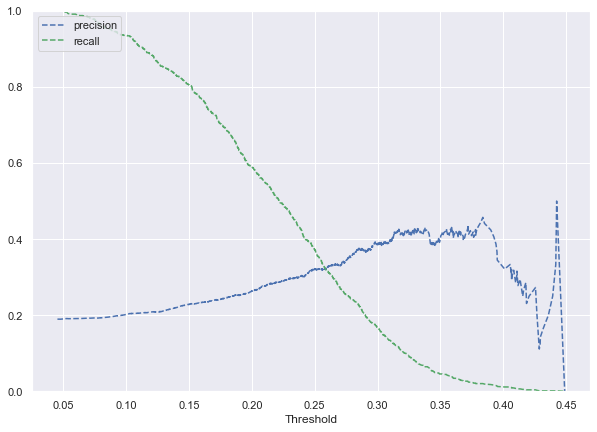

In [101]:
y_scores=log_reg.predict_proba(X_train) #predict_proba gives the probability of each observation belonging to each class


precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Inisights**
- we can see precision and recall are balanced at threshold about 0.26

 #### Compare the performance of the model on training and testing sets after changing the threshold

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      3382
           1       0.32      0.32      0.32       790

    accuracy                           0.75      4172
   macro avg       0.58      0.58      0.58      4172
weighted avg       0.74      0.75      0.74      4172



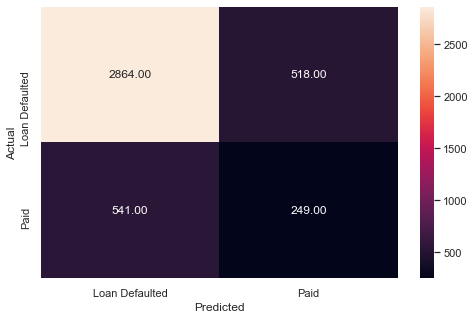

In [102]:
optimal_threshold1 = 0.26
metrics_score(y_train, y_scores[:,1]>optimal_threshold1)

**Reading confusion matrix:** 1- loan default is positive . 0-loan repaid is negative

**True Positive**: Predicting the customer will not pay back their loan and they dont

**False Negative**: Predicting the customer will pay back their loan but they end up defaulting

**True Negative**: Predicting the customer will pay back their loan and they do

**False Positive**: Predicting the customer will not pay back their loan and they do

**Insights**

- after using our optimal threshold of 0.26 our model is overfitting less vs the regular logistic regression model
- our goal is to reduce the false-negatives and this model (with optimum threshold) shows still a decent recall but not the best. With 85% recall it predicted 518 people will pay back their loan but they actually defaulted. We need to lower this number more.
- the model predicted high number of people will default on their loan when they actually did. Which is good.
- Overall model is accuracy is 75%

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1389
           1       0.37      0.34      0.36       399

    accuracy                           0.73      1788
   macro avg       0.60      0.59      0.59      1788
weighted avg       0.72      0.73      0.72      1788



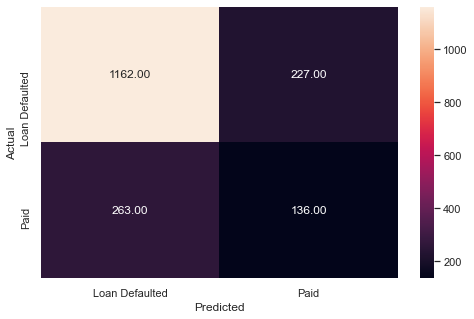

In [103]:
#Checking performance on the testing data
y_pred_test = log_reg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

**Reading confusion matrix:** 1- loan default is positive . 0-loan repaid is negative

**True Positive**: Predicting the customer will not pay back their loan and they dont

**False Negative**: Predicting the customer will pay back their loan but they end up defaulting

**True Negative**: Predicting the customer will pay back their loan and they do

**False Positive**: Predicting the customer will pay not back their loan and they do

**Insights**
- like the training data the test dat ais showing similar percentage of recal for our False Negative Values.
- precision and recall fr BAD-0 has dropped slightly while for it has increased for BAD-1

In [104]:
## total Cost = C(FN)xFN + C(FP)xFP
## FN is the number of positive observations wrongly predicted. So Predicting the customer will pay back their loan but they end up defaulting **
## FP is the number of negative examples wrongly predicted. So precting the customer will not pay back their loan and they do
## C is the cost associated with each
## The goal of this method is to choose a classifier with lowest total cost.

cost_of_false_negative = 10000 # lets assume this as the principle of a loan deafulting, bank can adjust accordingly as per loan amount
cost_of_false_postive = (10000) * 0.05 #the profit bank makes from interest on a loan that was paid

total_cost_of_model= 227*cost_of_false_negative + 263*cost_of_false_postive

total_cost_of_model

2401500.0

In [105]:
pd.Series(log_reg.coef_[0], index=X_train.columns).sort_values(ascending=False)


NINQ                           7.001963e-05
DEBTINC_missing_values_flag    6.481313e-05
VALUE_missing_values_flag      1.026761e-05
JOB_Self                       3.919144e-06
JOB_Sales                      2.737215e-06
CLAGE_missing_values_flag      1.017467e-06
VALUE                          7.125280e-07
DEROG                          0.000000e+00
DELINQ                         0.000000e+00
CLNO_missing_values_flag      -6.408987e-07
REASON_missing_values_flag    -1.894875e-06
MORTDUE_missing_values_flag   -2.347218e-06
MORTDUE                       -2.687258e-06
REASON_HomeImp                -3.010250e-06
JOB_ProfExe                   -4.444189e-06
JOB_Other                     -4.579996e-06
JOB_missing_values_flag       -5.578832e-06
YOJ_missing_values_flag       -5.747623e-06
NINQ_missing_values_flag      -6.614921e-06
DELINQ_missing_values_flag    -8.751615e-06
DEROG_missing_values_flag     -1.111984e-05
JOB_Office                    -1.231563e-05
LOAN                          -1

**(note * these are log odds to match the best of outcome variables)**
**Note- missing value flag are new columns made where NaN values were replaces with medians or modes.

- NINQ, DEBTINC_missing_values_flag, VALUE_missing_values_flag, JOB_Self, JOB_Sales, CLAGE_missing_values_flag, VALUE, DEROG, and DELINQ all have positive coefficients. They have positive effect on predicting a client wil repay back their loan and not end up defaulting. 
- Clearlly DEBTINC with all they= missing values shows a negative coefficient in predicting the right outcomes. But after the missing values are filled it shows a positive correlation. Likewise for CLAGE, DEROG, and DELING
- YOJ,CLNO seems to have a low effect despite having missing values or not. 
- JOB OTHER has low effect. JOB self and sales has the highest postitive correlation. 

### **Build a Decision Tree Model**

### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?

#### Data Preparation for the tree based model

In [106]:
# Add binary flags
# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)

In [107]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
# Remove _________ and complete the code
df[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
# Remove _________ and complete the code
for column in cat_data:
    mode = data[column].mode()[0]
    df[column] = df[column].fillna(mode)
    

In [108]:
df.drop(['MORTDUE_missing_values_flag', 'VALUE_missing_values_flag', 'REASON_missing_values_flag','JOB_missing_values_flag', 'YOJ_missing_values_flag', 'DEROG_missing_values_flag', 'DELINQ_missing_values_flag', 'CLAGE_missing_values_flag', 'NINQ_missing_values_flag','CLNO_missing_values_flag', 'DEBTINC_missing_values_flag'], axis=1)

BAD   LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0      1   1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1      1   1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2      1   1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3      1   1500  65019.0   89235.5  DebtCon   Other   7.0    0.0     0.0   
4      0   1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
...   ..    ...      ...       ...      ...     ...   ...    ...     ...   
5955   0  88900  57264.0   90185.0  DebtCon   Other  16.0    0.0     0.0   
5956   0  89000  54576.0   92937.0  DebtCon   Other  16.0    0.0     0.0   
5957   0  89200  54045.0   92924.0  DebtCon   Other  15.0    0.0     0.0   
5958   0  89800  50370.0   91861.0  DebtCon   Other  14.0    0.0     0.0   
5959   0  89900  48811.0   88934.0  DebtCon   Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
0      94.366667   1.0   9.0  34.818262  
1     121.833333   0.0  14.0  34.818262  
2     149.466667   1.0  10.0  34.818262  
3     173.466667   1.0  20.0  34.818262  
4      93.333333   0.0  14.0  34.818262  
...          ...   ...   ...        ...  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519  

[5960 rows x 13 columns]

#### Separating the target variable y and independent variable x

In [109]:
X=df.drop(columns = ['BAD'])
X = pd.get_dummies(X, drop_first=True)
Y= data.BAD


#### Split the data

In [110]:
# Split the data into training and test set
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.30, random_state=42)


In [111]:
# Choose the type of classifier 
d_tree = DecisionTreeClassifier(random_state=7, class_weight={0: 0.2, 1: 0.8})

#### Fit the decision tree classifier on the training data

In [112]:
#Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(random_state=42)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3382
           1       1.00      1.00      1.00       790

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



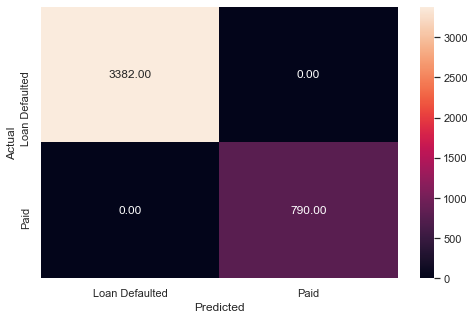

In [113]:
#Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)
metrics_score(y_train,y_pred_train1)

**Reading confusion matrix:** 1- loan default is positive . 0-loan repaid is negative

**True Positive**: Predicting the customer will not pay back their loan and they dont

**False Negative**: Predicting the customer will pay back their loan but they end up defaulting

**True Negative**: Predicting the customer will pay back their loan and they do

**False Positive**: Predicting the customer will not pay back their loan and they do  

**Insights**
- Decision Tree is predicting all the positives correctly and all the negatives accurately.
- 100% precision and 100% recall
- 100% f1-score
- our False-Negatives are minimized to 0
- Decision Tree could be overfitting

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1389
           1       0.73      0.68      0.71       399

    accuracy                           0.87      1788
   macro avg       0.82      0.80      0.81      1788
weighted avg       0.87      0.87      0.87      1788



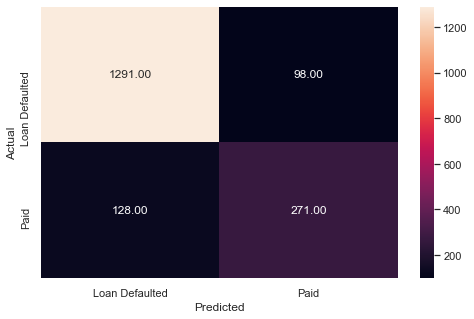

In [114]:
#Checking performance on the testing data

y_pred_test1 = d_tree.predict(X_test)
metrics_score(y_test,y_pred_test1)

**Reading confusion matrix:** 1- loan default is positive . 0-loan repaid is negative

**True Positive**: Predicting the customer will not pay back their loan and they dont

**False Negative**: Predicting the customer will pay back their loan but they end up defaulting

**True Negative**: Predicting the customer will pay back their loan and they do

**False Positive**: Predicting the customer will not pay back their loan and they do

**Insights**

- The model is still doing really good on the test data. 
- It is giving a 93% recall for our false negatives
- Model is giving 91% accuracy for True Negatives
- precion and recall has dropped significantly for our postives (1- loan default)
- 87% overall accuracy/f1-score

In [115]:
## total Cost = C(FN)xFN + C(FP)xFP
## FN is the number of positive observations wrongly predicted. So Predicting the customer will pay back their loan but they end up defaulting **
## FP is the number of negative examples wrongly predicted. So precting the customer will not pay back their loan and they do
## C is the cost associated with each
## The goal of this method is to choose a classifier with lowest total cost.

cost_of_false_negative = 10000 # lets assume this as the principle of a loan deafulting, bank can adjust accordingly as per loan amount
cost_of_false_postive = (10000) * 0.05 #the profit bank makes from interest on a loan that was paid

total_cost_of_model= 98*cost_of_false_negative + 128*cost_of_false_postive

total_cost_of_model

1044000.0

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [116]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state=42, class_weight={0: 0.2, 1: 0.8})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=9,
                       min_samples_leaf=25, random_state=42)

              precision    recall  f1-score   support

           0       0.96      0.88      0.91      3382
           1       0.61      0.83      0.70       790

    accuracy                           0.87      4172
   macro avg       0.78      0.85      0.81      4172
weighted avg       0.89      0.87      0.87      4172



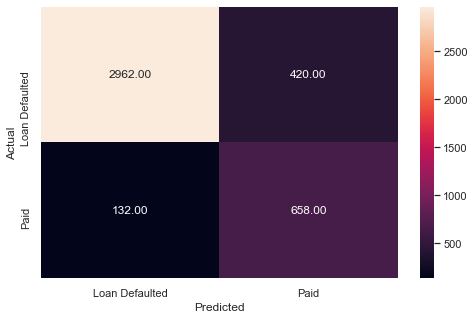

In [117]:
#Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)
metrics_score(y_train,y_pred_train2)

**Reading confusion matrix:** 1- loan default is positive . 0-loan repaid is negative

**True Positive**: Predicting the customer will not pay back their loan and they dont

**False Negative**: Predicting the customer will pay back their loan but they end up defaulting

**True Negative**: Predicting the customer will pay back their loan and they do

**False Positive**: Predicting the customer will not pay back their loan and they do

**Inisights**

- AFter the Decision is tuned with Hyperparameters and class weight we seem to have solved the overfitting problem the original decision tree was giving (it was giving 100% recal and preciion for everything)
- The tuned decision tree is doing really well tho. As we know we want to lower our False-Negatives. THis model did with a recall score of 88%. It is also giving preciion of 96%.
- the precision for BAD -1 (loan default) has dropped significantly (61%). This can be improved


              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1389
           1       0.62      0.80      0.70       399

    accuracy                           0.85      1788
   macro avg       0.78      0.83      0.80      1788
weighted avg       0.87      0.85      0.85      1788



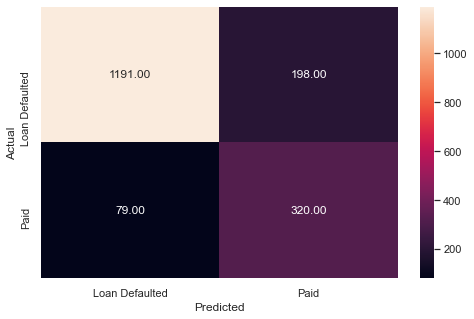

In [118]:
#Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)
metrics_score(y_test,y_pred_test2)

**Reading confusion matrix:** 1- loan default is positive . 0-loan repaid is negative

**True Positive**: Predicting the customer will not pay back their loan and they dont

**False Negative**: Predicting the customer will pay back their loan but they end up defaulting

**True Negative**: Predicting the customer will pay back their loan and they do

**False Positive**: Predicting the customer will not pay back their loan and they do

**Insights**
- the untuned decision tree was giving 93% recall on test data for BAD-0. While this tuned model is gicing 86%. Which isnt bad but there wasnt an increase. Recall for BAD-1 has went up from 68% to 80% tho.


In [119]:
## total Cost = C(FN)xFN + C(FP)xFP
## FN is the number of positive observations wrongly predicted. So Predicting the customer will pay back their loan but they end up defaulting **
## FP is the number of negative examples wrongly predicted. So precting the customer will not pay back their loan and they do
## C is the cost associated with each
## The goal of this method is to choose a classifier with lowest total cost.

cost_of_false_negative = 10000 # lets assume this as the principle of a loan deafulting, bank can adjust accordingly as per loan amount
cost_of_false_postive = (10000) * 0.05 #the profit bank makes from interest on a loan that was paid

total_cost_of_model= 198*cost_of_false_negative + 79*cost_of_false_postive

total_cost_of_model

2019500.0

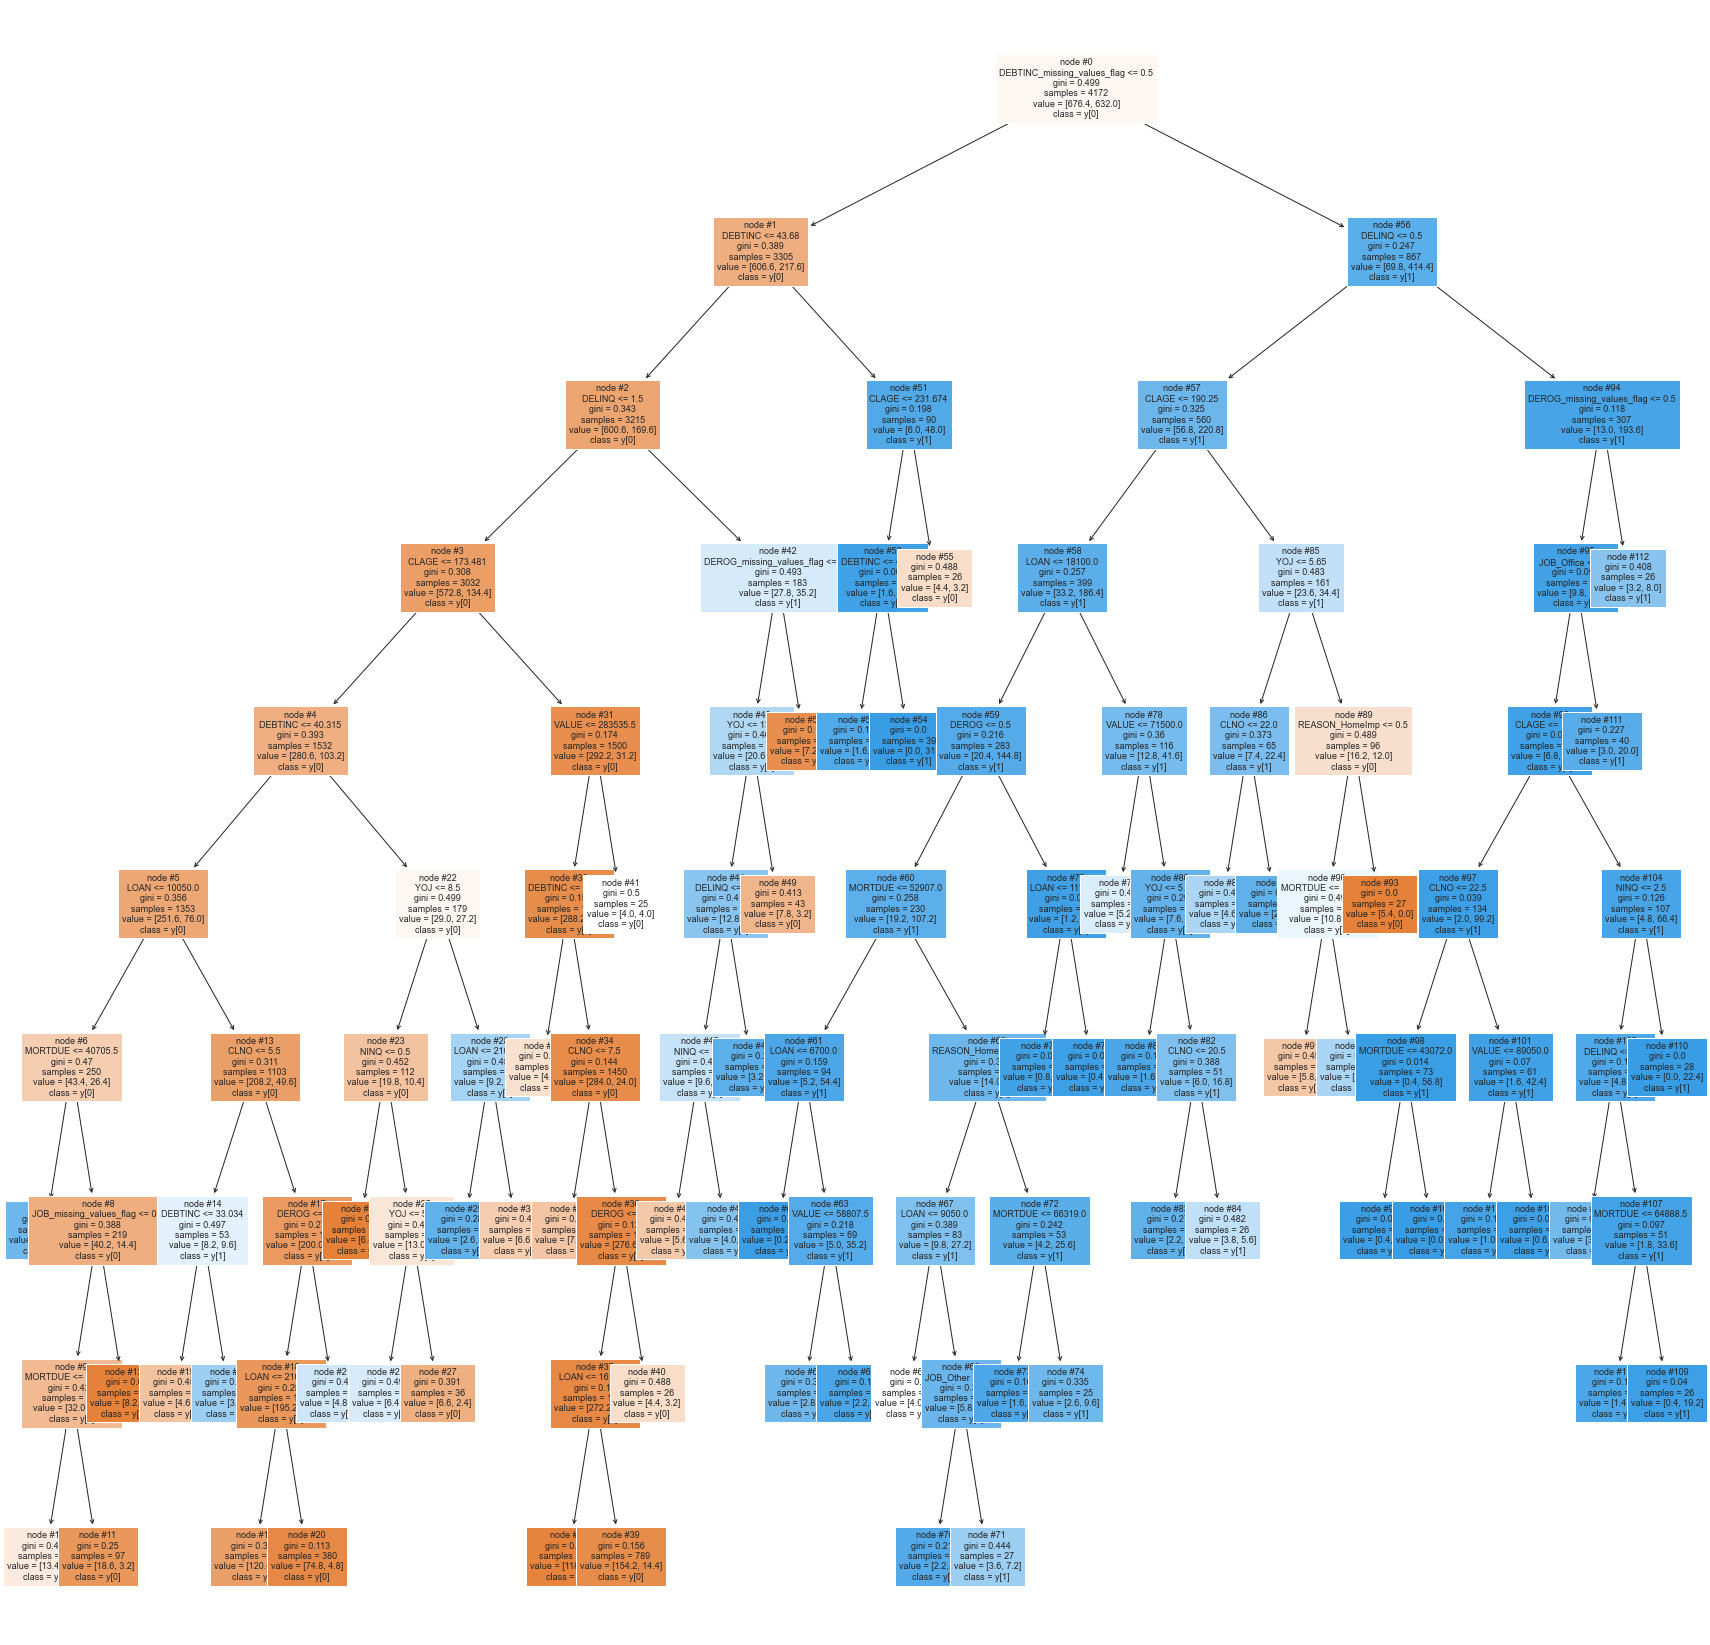

In [120]:
features = list(X.columns)

plt.figure(figsize=(30,30))

tree.plot_tree(d_tree_tuned,feature_names=features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [121]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
DEBTINC_missing_values_flag  0.568126
DEBTINC                      0.143988
DELINQ                       0.059948
CLAGE                        0.054499
LOAN                         0.030090
MORTDUE                      0.028948
YOJ                          0.027505
CLNO                         0.020318
DEROG                        0.017732
DEROG_missing_values_flag    0.013380
VALUE                        0.011538
NINQ                         0.010059
REASON_HomeImp               0.007779
JOB_missing_values_flag      0.003569
JOB_Other                    0.001627
JOB_Office                   0.000893
YOJ_missing_values_flag      0.000000
REASON_missing_values_flag   0.000000
DELINQ_missing_values_flag   0.000000
CLAGE_missing_values_flag    0.000000
NINQ_missing_values_flag     0.000000
CLNO_missing_values_flag     0.000000
VALUE_missing_values_flag    0.000000
MORTDUE_missing_values_flag  0.000000
JOB_ProfExe                  0.000000
JOB_Sales   

### DEBTINC where all the missing values are replaced with the medians is showing to give the highest importance in the decision tree. After DEBTINC the decision tree breaks down the number of derogatory reports and deliquencies. Then it looks as the age of exisiting credit lines and how long they are open for.


### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [122]:
#Fitting the decision tree classifier on the training data
#define random forest classfier
rf_estimator = RandomForestClassifier(random_state=42)

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

##### Let's check the performance of the model on the training data:



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3382
           1       1.00      1.00      1.00       790

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



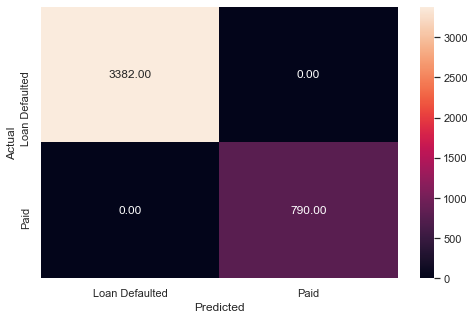

In [123]:
#Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train3)

**Reading confusion matrix:** 1- loan default is positive . 0-loan repaid is negative

**True Positive**: Predicting the customer will not pay back their loan and they dont

**False Negative**: Predicting the customer will pay back their loan but they end up defaulting

**True Negative**: Predicting the customer will pay back their loan and they do

**False Positive**: Predicting the customer will not pay back their loan and they do

**Insights**
- Just like the untuned Decision Tree, obviously the untune Random Forest is also showing perfect results and no miss predictions
- Random Forest is predicting all the positives correctly and all the negatives accurately.
- 100% precision and 100% recall
- 100% f1-score
- our False-Negatives are minimized to 0
- Random Forest could be overfitting as well like DT


              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1389
           1       0.86      0.68      0.76       399

    accuracy                           0.90      1788
   macro avg       0.89      0.82      0.85      1788
weighted avg       0.90      0.90      0.90      1788



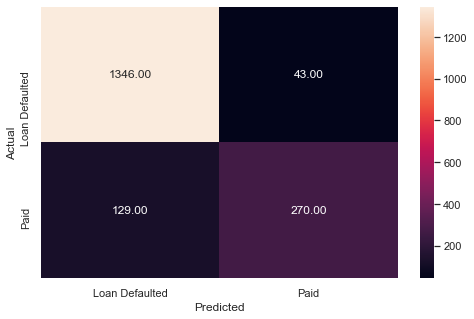

In [124]:
#Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test3)

- Once again very similar to the test data on the original untuned decision tree.
- the recall for BAD-0 aka our False Negatives are a bit better. The test data for the original decision tree was showing 93% recall while this random forest is showing 97%. Recall-1 is the same for both (68%)
- precision-0 is the same for both at 91%. The randim forest is showing better precsion-1 tho. 73% vs 86%
- Overall accuracy/f1-score is better than original decision tree. Went up from 87% to 90%

In [125]:
## total Cost = C(FN)xFN + C(FP)xFP
## FN is the number of positive observations wrongly predicted. So Predicting the customer will pay back their loan but they end up defaulting **
## FP is the number of negative examples wrongly predicted. So precting the customer will not pay back their loan and they do
## C is the cost associated with each
## The goal of this method is to choose a classifier with lowest total cost.

cost_of_false_negative = 10000 # lets assume this as the principle of a loan deafulting, bank can adjust accordingly as per loan amount
cost_of_false_postive = (10000) * 0.05 #the profit bank makes from interest on a loan that was paid

total_cost_of_model= 43*cost_of_false_negative + 129*cost_of_false_postive

total_cost_of_model

494500.0

### **Build a Random Forest model with Class Weights**

In [126]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion="entropy", random_state=42)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1],
    "class_weight": [{0:0.2, 1:0.8}]     }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_


In [127]:
#Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=5, max_features=1, n_estimators=120,
                       random_state=42)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3382
           1       0.66      0.78      0.71       790

    accuracy                           0.88      4172
   macro avg       0.80      0.84      0.82      4172
weighted avg       0.89      0.88      0.89      4172



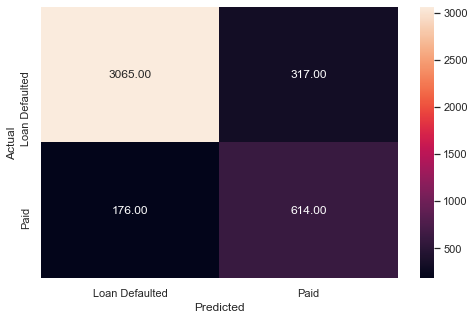

In [128]:
#Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train4)

### Here we just add class weights to the Radnom forest, it makes barely any difference

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1389
           1       0.69      0.77      0.72       399

    accuracy                           0.87      1788
   macro avg       0.81      0.83      0.82      1788
weighted avg       0.88      0.87      0.87      1788



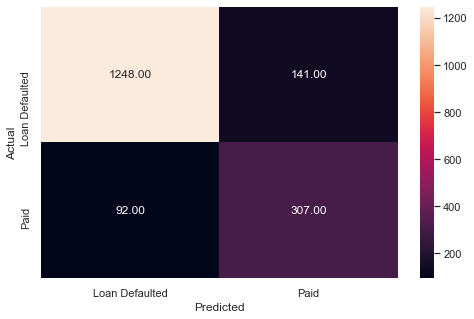

In [129]:
y_pred_test4 = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test4)

In [130]:
## total Cost = C(FN)xFN + C(FP)xFP
## FN is the number of positive observations wrongly predicted. So Predicting the customer will pay back their loan but they end up defaulting **
## FP is the number of negative examples wrongly predicted. So precting the customer will not pay back their loan and they do
## C is the cost associated with each
## The goal of this method is to choose a classifier with lowest total cost.

cost_of_false_negative = 10000 # lets assume this as the principle of a loan deafulting, bank can adjust accordingly as per loan amount
cost_of_false_postive = (10000) * 0.05 #the profit bank makes from interest on a loan that was paid

total_cost_of_model= 141*cost_of_false_negative + 92*cost_of_false_postive

total_cost_of_model

1456000.0

### Tune the random forest classifier using GridSearchCV 

In [131]:
# Choose the type of classifier
rf_estimator_GSCV = RandomForestClassifier(criterion="entropy", random_state=7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": [{0:0.2, 1:0.8}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_GSCV = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_GSCV.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=7, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=20, n_estimators=120, random_state=42)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3382
           1       0.67      0.79      0.72       790

    accuracy                           0.89      4172
   macro avg       0.81      0.85      0.83      4172
weighted avg       0.90      0.89      0.89      4172



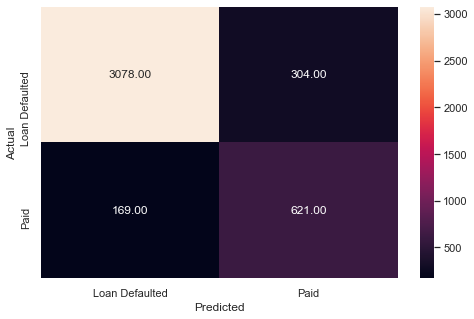

In [132]:
#Checking performance on the training data
y_pred_train5 = rf_estimator_GSCV.predict(X_train)
metrics_score(y_train, y_pred_train5)

**Reading confusion matrix:** 1- loan default is positive . 0-loan repaid is negative

**True Positive**: Predicting the customer will not pay back their loan and they dont

**False Negative**: Predicting the customer will pay back their loan but they end up defaulting

**True Negative**: Predicting the customer will pay back their loan and they do

**False Positive**: Predicting the customer will not pay back their loan and they do

**Insights**

- Since the original Random forest was overfitting like the original decision tree. We hyperparameter tuned it and added GridSearch CV
- this is by far the best model. 
- After the decision tree was tuned it was showing 88% Recall-0 and 83% Recall-1. This tuned RF classifier is showing 91% for Recall-0 and a slightly lower 79% for Recall-1
- Precision went up for BAD-0 from 91% to 95% in comparison to the tuned DT. Also went up from 61% to 67% for Precision-1
- F1-Score has also went up to 90% for recall-0 
- overall model accuracy went up from 87% (tuned DT) to 89% in this tuned RF

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1389
           1       0.72      0.76      0.74       399

    accuracy                           0.88      1788
   macro avg       0.83      0.84      0.83      1788
weighted avg       0.88      0.88      0.88      1788



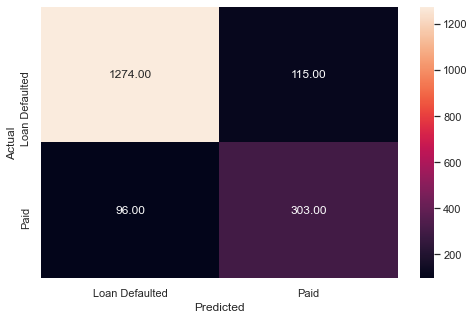

In [133]:
#Checking performance on the testing data
y_pred_test5 = rf_estimator_GSCV.predict(X_test)
metrics_score(y_test, y_pred_test5)

**Insights**
- vs the tuned DT this tuned RF is also giving better test results just like the training data. 
-  Since the original Random forest was overfitting like the original decision tree. We hyperparameter tuned it and added GridSearch CV
- this is by far the best model. 
- After the decision tree was tuned it was showing 86% Recall-0 and 80% Recall-1. This tuned RF classifier is showing 92% for Recall-0 and a slightly lower 76% for Recall-1
- Precision stayed the same -> BAD-0 from 94% to 93% in comparison to the tuned DT. Also Precions-1 went up from 62% to 72%
- F1-Score has also went up to 92% for recall-0 
- overall model accuracy went up from 85% (tuned DT) to 88% in this tuned RF

In [134]:
## total Cost = C(FN)xFN + C(FP)xFP
## FN is the number of positive observations wrongly predicted. So Predicting the customer will pay back their loan but they end up defaulting **
## FP is the number of negative examples wrongly predicted. So precting the customer will not pay back their loan and they do
## C is the cost associated with each
## The goal of this method is to choose a classifier with lowest total cost.

cost_of_false_negative = 10000 # lets assume this as the principle of a loan deafulting, bank can adjust accordingly as per loan amount
cost_of_false_postive = (10000) * 0.05 #the profit bank makes from interest on a loan that was paid

total_cost_of_model= 115*cost_of_false_negative + 96*cost_of_false_postive

total_cost_of_model

1198000.0

#### Plot the Feature importance of the tuned Random Forest

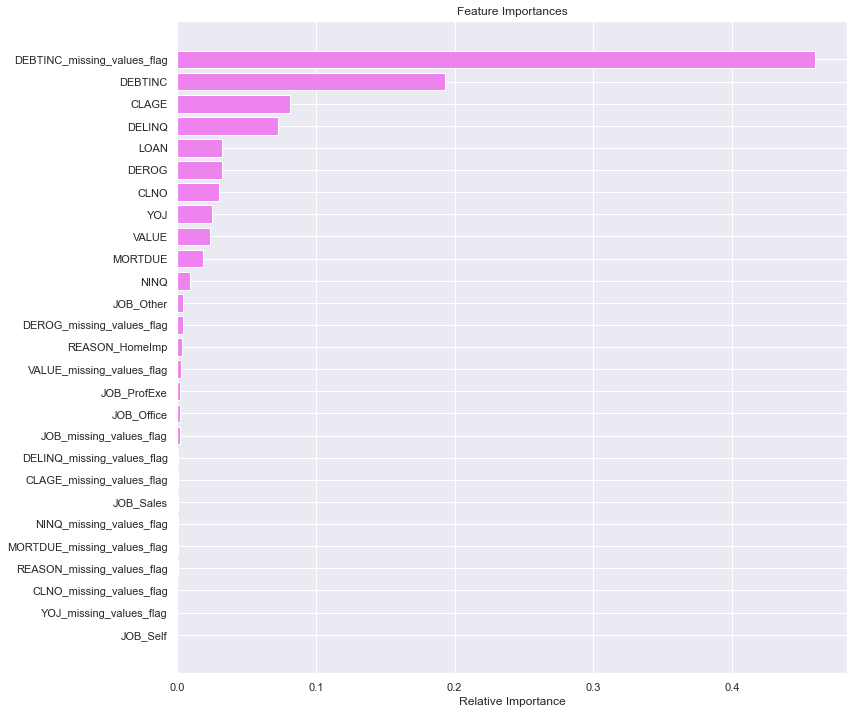

In [135]:
importances = rf_estimator_GSCV.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Insights**
- Just like the DT the RF is also giving highest importance to the DEBTINC data where the missing values (NaN) are filled with medians.
- then its giving high importance to average age of credit lines, loan value, deliquencies, and derogatory reports. 
- the RF isnt giving high importance to new columns made for DEROG AND DELING missing values while the DT did.

### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest 
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement? 

**We couldve also performed models such as supprt vector classifers, KNN's, KNN neighbours, QDA, gradient booster classifiers. Although even if we made these models the Random Forest tuned classifier would give the best train and test results. Furtermost, It would give the the best recall which is our measuring metric. Please see chart below.**

<AxesSubplot:title={'center':'Classifier Recall'}, xlabel='Recall', ylabel='Classifier'>

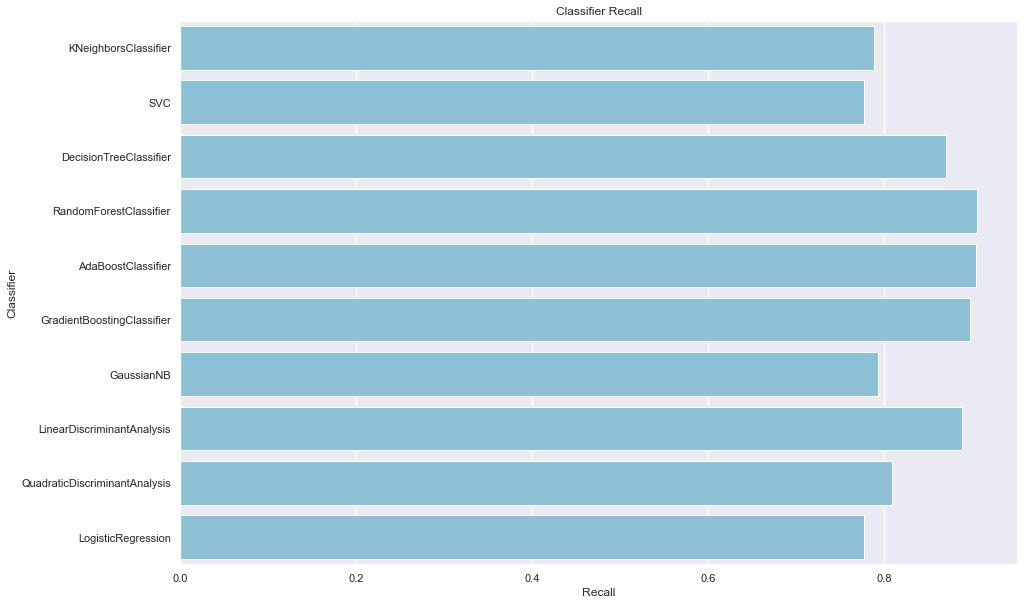

In [136]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]

log_cols = ["Classifier", "Recall"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
        
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf]
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns = log_cols)
    log = log.append(log_entry)

plt.xlabel('Recall')
plt.title('Classifier Recall')

sns.set_color_codes("muted")
sns.barplot(x = 'Recall', y = 'Classifier', data = log, color = "c")

In [137]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [138]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [139]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [140]:
# Make the list of all the model names 

models = [log_reg, d_tree,d_tree_tuned,rf_estimator, rf_estimator_GSCV]
# Remove _________ and complete the code

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [141]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]
# Remove _________ and complete the code

comparison_frame = pd.DataFrame({'Models':['Logistic Regression','Decision Tree', 'Tuned Decision Tree', 'Random Forest', 'Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

Models  Train_Accuracy  Test_Accuracy  Train_Recall  \
0  Logistic Regression        0.810642       0.776846      0.000000   
1        Decision Tree        1.000000       0.873602      1.000000   
2  Tuned Decision Tree        0.867689       0.845078      0.832911   
3        Random Forest        1.000000       0.903803      1.000000   
4  Tuned Random Forest        0.886625       0.881991      0.786076   

   Test_Recall  Train_Precision  Test_Precision  
0     0.000000         0.000000        0.000000  
1     0.679198         1.000000        0.734417  
2     0.802005         0.610390        0.617761  
3     0.676692         1.000000        0.862620  
4     0.759398         0.671351        0.724880

**Insights:**
- original RF and DT gave overfitted results.
- After the model for RF tuned it showed the best results and best overall results for our metric score: Recall

  **1. Refined insights -** What are the most meaningful insights from the data relevant to the problem?
  
  **2. Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
  
  **3. Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?

### Please see powerpoint for full insights and comparisons